## Набор данных с опроса разработчиков сайта "Stack Overflow"

Каждый год мы в Stack Overflow спрашиваем сообщество разработчиков обо всем, от их любимых технологий до их предпочтений в работе. В январе 2018 года более 100 000 разработчиков приняли участие в 30-минутном опросе. Давайте раассмотрим данный датасет.


Содержимое датасета:

1. Импортирование набора данных и его исследование

2. Предварительный анализ данных (EDA)
*   Числовые данные
*   Порядковые данные
*   Номинальные данные

3. Выявление аномалий
*   Z-оценка
*   IQR метод
*   Аномалии

4. Импутация данных

5. Разработка функций
*   Работа со стоимостью по языку
*   Тип разработчика с зарплатой

6. Выбор функций

7. Первые результаты

8. Настройка модели

9. Результат

1. Импортирование набора данных и его исследование.

Здесь мы импортируем все нужные нам библиотеки, для посмотрения графиков и таблиц. Также снизу мы добавляем файл с нашим датасетом.

In [ ]:
import numpy as np  
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as ss
import missingno as msno
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly import tools
from pathlib import Path 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from itertools import combinations
from collections import Counter
from sklearn.metrics import mean_squared_error   
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor , ExtraTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

In [ ]:
pd.set_option('display.max_rows', 20)

In [ ]:
df_results_public = pd.read_csv('/survey_results_public.csv', low_memory=False)

In [ ]:
df_survey_results_schema = pd.read_csv('/survey_results_public.csv', low_memory=False)
df_survey_results_schema

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44994,63850,No,No,Hong Kong (S.A.R.),No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,100 to 499 employees,Back-end developer;Front-end developer;Full-st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44995,63851,Yes,Yes,Brazil,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",10 to 19 employees,Front-end developer;QA or test developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44996,63854,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A health science (ex. nursing, pharmacy, radio...",20 to 99 employees,Back-end developer,...,1 - 2 times per week,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,35 - 44 years old,Yes,No,The survey was too long,Somewhat easy
44997,63855,Yes,No,Russian Federation,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",100 to 499 employees,Back-end developer;Database administrator;Desk...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Предварительный анализ данных (EDA).

Здесь мы выведем таблицу со всеми нашими данными и посмотрим, анализ каких столбцов можно будет провести.

In [ ]:
df_results_public.head(3)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df_results_public.reset_index(drop=True)
df.index

RangeIndex(start=0, stop=44999, step=1)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Respondent,44999.00,31975.14,18425.54,1.00,16045.50,31955.00,47931.50,63856.00
AssessJob1,32721.00,6.56,2.75,1.00,5.00,7.00,9.00,10.00
AssessJob2,32721.00,6.63,2.54,1.00,5.00,7.00,9.00,10.00
AssessJob3,32721.00,5.94,2.65,1.00,4.00,6.00,8.00,10.00
AssessJob4,32721.00,4.06,2.53,1.00,2.00,4.00,6.00,10.00
...,...,...,...,...,...,...,...,...
AdsPriorities3,29337.00,3.35,1.67,1.00,2.00,3.00,5.00,7.00
AdsPriorities4,29337.00,3.80,1.84,1.00,2.00,4.00,5.00,7.00
AdsPriorities5,29337.00,4.39,1.92,1.00,3.00,5.00,6.00,7.00
AdsPriorities6,29337.00,5.16,1.85,1.00,4.00,6.00,7.00,7.00


In [ ]:
#Находим информацию о нулевом значении, если таковые имеются и выводим их
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("red", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return

In [ ]:
missing_value_table(df)

,Missing Values,% Value
TimeAfterBootcamp,41728,92
MilitaryUS,36801,81
HackathonReasons,32225,71
ErgonomicDevices,28185,62
AdBlockerReasons,26519,58
StackOverflowJobsRecommend,25430,56
JobEmailPriorities2,22775,50
JobEmailPriorities7,22775,50
JobEmailPriorities6,22775,50
JobEmailPriorities1,22775,50


In [ ]:
# более %60 столбцов со нулевым значением было найдено, удаляем их. 
df.drop(['Respondent', 'MilitaryUS', 'TimeAfterBootcamp', 'HackathonReasons', 'ErgonomicDevices', 'AdBlockerReasons', 'StackOverflowJobsRecommend'], axis=1, inplace=True)

In [ ]:
# Удаляем столбцы, связанные с зарплатой
df.drop(['Salary', 'SalaryType', 'Currency', 'CurrencySymbol'], axis=1, inplace=True)

In [ ]:
# Посмотрим форму после удаления 11 столбцов
df.shape

(44999, 118)

Числовые значения

In [ ]:
#Просмотр числовых данных
df_numerical = df[[ 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9',
                    'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6',
                    'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1',
                    'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1',
                    'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7',
                    'ConvertedSalary', 'AdsPriorities1', 'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4', 'AdsPriorities5', 'AdsPriorities6', 'AdsPriorities7']]


In [ ]:
df_numerical.shape

(44999, 41)

Порядковые значения

In [ ]:
# Просмотр порядковых значений
df_ordinal = df[['FormalEducation', 'CompanySize', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'LastNewJob',
                  'TimeFullyProductive', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'NumberMonitors',
                  'CheckInCode', 'AdsAgreeDisagree1', 'AdsAgreeDisagree2', 'AdsAgreeDisagree3','StackOverflowRecommend',
                  'StackOverflowVisit', 'StackOverflowParticipate', 'HypotheticalTools1', 'HypotheticalTools2',
                  'HypotheticalTools3', 'HypotheticalTools4', 'HypotheticalTools5', 'WakeTime', 'HoursComputer', 'HoursOutside', 'SkipMeals', 'Exercise',
                  'EducationParents', 'Age', 'SurveyTooLong', 'SurveyEasy']]


In [ ]:
df_ordinal.shape

(44999, 33)

Номинальные значения

In [ ]:
#Столбец с полом записан как "M" и "F" и т.д.
df.Gender.replace({ 'Male': 'M', 'Female': 'F',
                    'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming': 'O',
                    'Female;Male': 'O',
                    'Male;Non-binary, genderqueer, or gender non-conforming': 'O',
                    'Non-binary, genderqueer, or gender non-conforming': 'O', 'Transgender': 'O',
                    'Female;Transgender': 'O',
                    'Transgender;Non-binary, genderqueer, or gender non-conforming': 'O',
                    'Female;Non-binary, genderqueer, or gender non-conforming': 'O',
                    'Female;Transgender;Non-binary, genderqueer, or gender non-conforming': 'O',
                    'Male;Transgender': 'O', 'Female;Male;Transgender': 'O',
                    'Female;Male;Non-binary, genderqueer, or gender non-conforming': 'O',
                    'Male;Transgender;Non-binary, genderqueer, or gender non-conforming': 'O'}, inplace=True)

In [ ]:
df_categorical = df[[ 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'UndergradMajor', 'UpdateCV','DevType', 'HopeFiveYears', 'JobSearchStatus',
                      'CommunicationTools', 'EducationTypes', 'SelfTaughtTypes','LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 
                      'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE', 
                      'OperatingSystem', 'Methodology', 'VersionControl', 'AdBlocker',   'AdBlockerDisable', 'AdsActions', 'AIDangerous', 'AIInteresting',
                      'AIResponsible', 'EthicsReport', 'EthicsResponsible', 'EthicalImplications', 'StackOverflowHasAccount', 'StackOverflowJobs',
                      'StackOverflowDevStory', 'StackOverflowConsiderMember', 'Gender', 'SexualOrientation', 'RaceEthnicity',
                      'Dependents', 'EthicsChoice','AIFuture']]


In [ ]:
df_categorical.shape

(44999, 44)

In [ ]:
# Все колонки проверены
df_categorical = df_categorical.astype('category')

In [ ]:
df_categorical.dtypes

Hobby                category
OpenSource           category
Country              category
Student              category
Employment           category
                       ...   
SexualOrientation    category
RaceEthnicity        category
Dependents           category
EthicsChoice         category
AIFuture             category
Length: 44, dtype: object

In [ ]:
# Посмотрим количество уникальных значений
dfu = pd.DataFrame(df.nunique())
dfu.sort_values(by=[0], ascending=False)

,0
LanguageDesireNextYear,15535
LanguageWorkedWith,14854
PlatformDesireNextYear,7905
DatabaseDesireNextYear,6198
PlatformWorkedWith,5560
...,...
AdBlockerDisable,3
OpenSource,2
Employment,2
Dependents,2


Обработка номинальных, порядковых и категориальных функций.

Обработка порядковых функций.




In [ ]:
# Порядковые номера в данном случае были найдены вручную
df.FormalEducation.replace({'Bachelor’s degree (BA, BS, B.Eng., etc.)':5, 
                            'Associate degree':4,
                            'Some college/university study without earning a degree':3,
                            'Master’s degree (MA, MS, M.Eng., MBA, etc.)':7,
                            'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':2,
                            'Primary/elementary school':1,
                            'Professional degree (JD, MD, etc.)':6,
                            'I never completed any formal education':0,
                            'Other doctoral degree (Ph.D, Ed.D., etc.)':8},inplace=True)

In [ ]:
df.CompanySize.replace({'20 to 99 employees': 2, '10,000 or more employees': 7,
                        '100 to 499 employees': 3, '10 to 19 employees': 1,
                        '500 to 999 employees': 4, '1,000 to 4,999 employees': 5,
                        '5,000 to 9,999 employees': 6, 'Fewer than 10 employees': 0}, inplace=True)

In [ ]:
df.CompanySize.replace({'20 to 99 employees': 2, '10,000 or more employees': 7,
                        '100 to 499 employees': 3, '10 to 19 employees': 1,
                        '500 to 999 employees': 4, '1,000 to 4,999 employees': 5,
                        '5,000 to 9,999 employees': 6, 'Fewer than 10 employees': 0}, inplace=True)

In [ ]:
df.YearsCodingProf.replace({'3-5 years':2, '30 or more years':11, '24-26 years':9, '18-20 years':7,
                            '6-8 years':3, '9-11 years':4, '0-2 years':1, '15-17 years':6,
                            '12-14 years':5, '21-23 years':8, '27-29 years':10},inplace=True)

In [ ]:
df.JobSatisfaction.replace({'Moderately dissatisfied':-2, 'Slightly satisfied':1,
                            'Moderately satisfied':2, 'Neither satisfied nor dissatisfied':0,
                            'Slightly dissatisfied':-1, 'Extremely dissatisfied':-3,
                            'Extremely satisfied':3},inplace=True)

In [ ]:
df.CareerSatisfaction.replace({    'Moderately dissatisfied':-2, 'Slightly satisfied':1,
                                   'Moderately satisfied':2, 'Neither satisfied nor dissatisfied':0,
                                   'Slightly dissatisfied':-1,'Extremely dissatisfied':-3,
                                   'Extremely satisfied':3},inplace=True)

In [ ]:
df.LastNewJob.replace({'Less than a year ago': 1, 'More than 4 years ago': 4,
                       'Between 1 and 2 years ago': 2, 'Between 2 and 4 years ago': 3, "I've never had a job": 0}, inplace=True)


In [ ]:
df.TimeFullyProductive.replace({'One to three months':1, 'Three to six months':2,
                                'Less than a month':0, 'Six to nine months':3, 'More than a year':5,
                                'Nine months to a year':4},inplace=True)

In [ ]:
df.HoursOutside.replace({   '30 - 59 minutes':2, '1 - 2 hours':3, 'Less than 30 minutes':1,
                            '3 - 4 hours':4, 'Over 4 hours':5},inplace=True)

In [ ]:
df.HoursComputer.replace({'5 - 8 hours':2, 'Over 12 hours':4, '9 - 12 hours':3, '1 - 4 hours':1,
                        'Less than 1 hour':0},inplace=True)

In [ ]:
df.EducationParents.replace({'Bachelor’s degree (BA, BS, B.Eng., etc.)': 5,
                            'Associate degree': 4,
                            'Some college/university study without earning a degree': 3,
                            'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 7,
                            'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 2,
                            'Primary/elementary school': 1,
                            'Professional degree (JD, MD, etc.)': 6,
                            'They never completed any formal education': 0,
                            'Other doctoral degree (Ph.D, Ed.D., etc.)': 8}, inplace=True)


In [ ]:
df.Age.replace({'Under 18 years old': 0, '18 - 24 years old': 1,
                '25 - 34 years old': 2, '35 - 44 years old': 3,
                '45 - 54 years old': 4, '55 - 64 years old': 5,
                '65 years or older': 6}, inplace=True)


In [ ]:
df.AgreeDisagree1.replace({'Strongly agree': 4, 'Agree': 3, 'Disagree': 1,
                             'Neither Agree nor Disagree': 2, 'Strongly disagree': 0}, inplace=True)


In [ ]:
df.AgreeDisagree2.replace({'Strongly agree': 4, 'Agree': 3, 'Disagree': 1,
                            'Neither Agree nor Disagree': 2, 'Strongly disagree': 0}, inplace=True)


In [ ]:
df.AgreeDisagree3.replace({'Strongly agree': 4, 'Agree': 3, 'Disagree': 1,
                             'Neither Agree nor Disagree': 2, 'Strongly disagree': 0}, inplace=True)

In [ ]:
df.NumberMonitors.replace({'More than 4': 4, '4': 3, '3': 2,
                             '2':1, '1': 0}, inplace=True)

In [ ]:
HistList = ['HypotheticalTools1', 'HypotheticalTools2', 'HypotheticalTools3','HypotheticalTools4', 'HypotheticalTools5']
for i in HistList:
    df[i].replace({'A little bit interested':1, 'Extremely interested':4,
                    'Very interested':3, 'Not at all interested':0, 'Somewhat interested':2,}, inplace=True)

In [ ]:
AdsAgreeDisagree = ['AdsAgreeDisagree1', 'AdsAgreeDisagree2', 'AdsAgreeDisagree3']
for i in AdsAgreeDisagree:
    df[i].replace({'Somewhat agree':2, 'Somewhat disagree':-1,
                            'Neither agree nor disagree':0, 'Strongly agree':1,
                            'Strongly disagree':-2}, inplace=True)

In [ ]:
df.SurveyTooLong.replace({'The survey was an appropriate length':0, 'The survey was too long':1,'The survey was too short':-1}, inplace=True)

In [ ]:
df.SkipMeals.replace({'Never':0, '1 - 2 times per week':1, 'Daily or almost every day':3,
       '3 - 4 times per week':2}, inplace=True)

In [ ]:
df.Exercise.replace({'Daily or almost every day':3, '3 - 4 times per week':2,
       '1 - 2 times per week':1, "I don't typically exercise":0,}, inplace=True)


In [ ]:
df.SurveyEasy.replace({'Somewhat easy':1, 'Very easy':2, 'Neither easy nor difficult':0,
       'Somewhat difficult':-1, 'Very difficult':-2}, inplace=True)

In [ ]:
df.CheckInCode.replace({ 'A few times per week':3, 'Weekly or a few times per month':2,
       'Multiple times per day':5, 'Never':0, 'Less than once per month':1,
       'Once a day':4,}, inplace=True)

In [ ]:
df.StackOverflowVisit.replace({ 'Multiple times per day':5, 'Daily or almost daily':4,
       'A few times per week':3, 'A few times per month or weekly':2, 'Less than once per month or monthly':1,
      'I have never visited Stack Overflow (before today)':0,}, inplace=True)
df.StackOverflowParticipate.replace({ 'Multiple times per day':5, 'Daily or almost daily':4,
       'A few times per week':3, 'A few times per month or weekly':2, 'Less than once per month or monthly':1,
      'I have never participated in Q&A on Stack Overflow':0,}, inplace=True)
df.StackOverflowRecommend.replace({ '10 (Very Likely)':10,'9':9,'8':8, '7':7,'6':6,'5':5, '4':4,'3':3,'2':2,'1':1,
      '0 (Not Likely)':0}, inplace=True)
df.WakeTime.replace({ 'I work night shifts':10,'Before 5:00 AM':9,'Between 5:00 - 6:00 AM':8,'Between 6:01 - 7:00 AM':7, 'Between 7:01 - 8:00 AM':6,'Between 8:01 - 9:00 AM':5,
                     'Between 9:01 - 10:00 AM':4,'Between 10:01 - 11:00 AM':3, 'Between 11:01 AM - 12:00 PM':2,'After 12:01 PM':1,
     'I do not have a set schedule':0}, inplace=True)

In [ ]:
df_ordinal_encoding = df[['FormalEducation', 'CompanySize', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'LastNewJob',
                          'TimeFullyProductive', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'NumberMonitors', 'CheckInCode', 'AdsAgreeDisagree1',
                          'AdsAgreeDisagree2', 'AdsAgreeDisagree3', 'StackOverflowRecommend', 'StackOverflowVisit', 'StackOverflowParticipate', 'HypotheticalTools1',
                          'HypotheticalTools2', 'HypotheticalTools3', 'HypotheticalTools4', 'HypotheticalTools5', 'WakeTime', 'HoursComputer', 'HoursOutside', 'SkipMeals',
                          'Exercise', 'EducationParents', 'Age', 'SurveyTooLong', 'SurveyEasy']]

In [ ]:
df_ordinal_encoding.shape

(44999, 33)

HeatMap порядковых данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


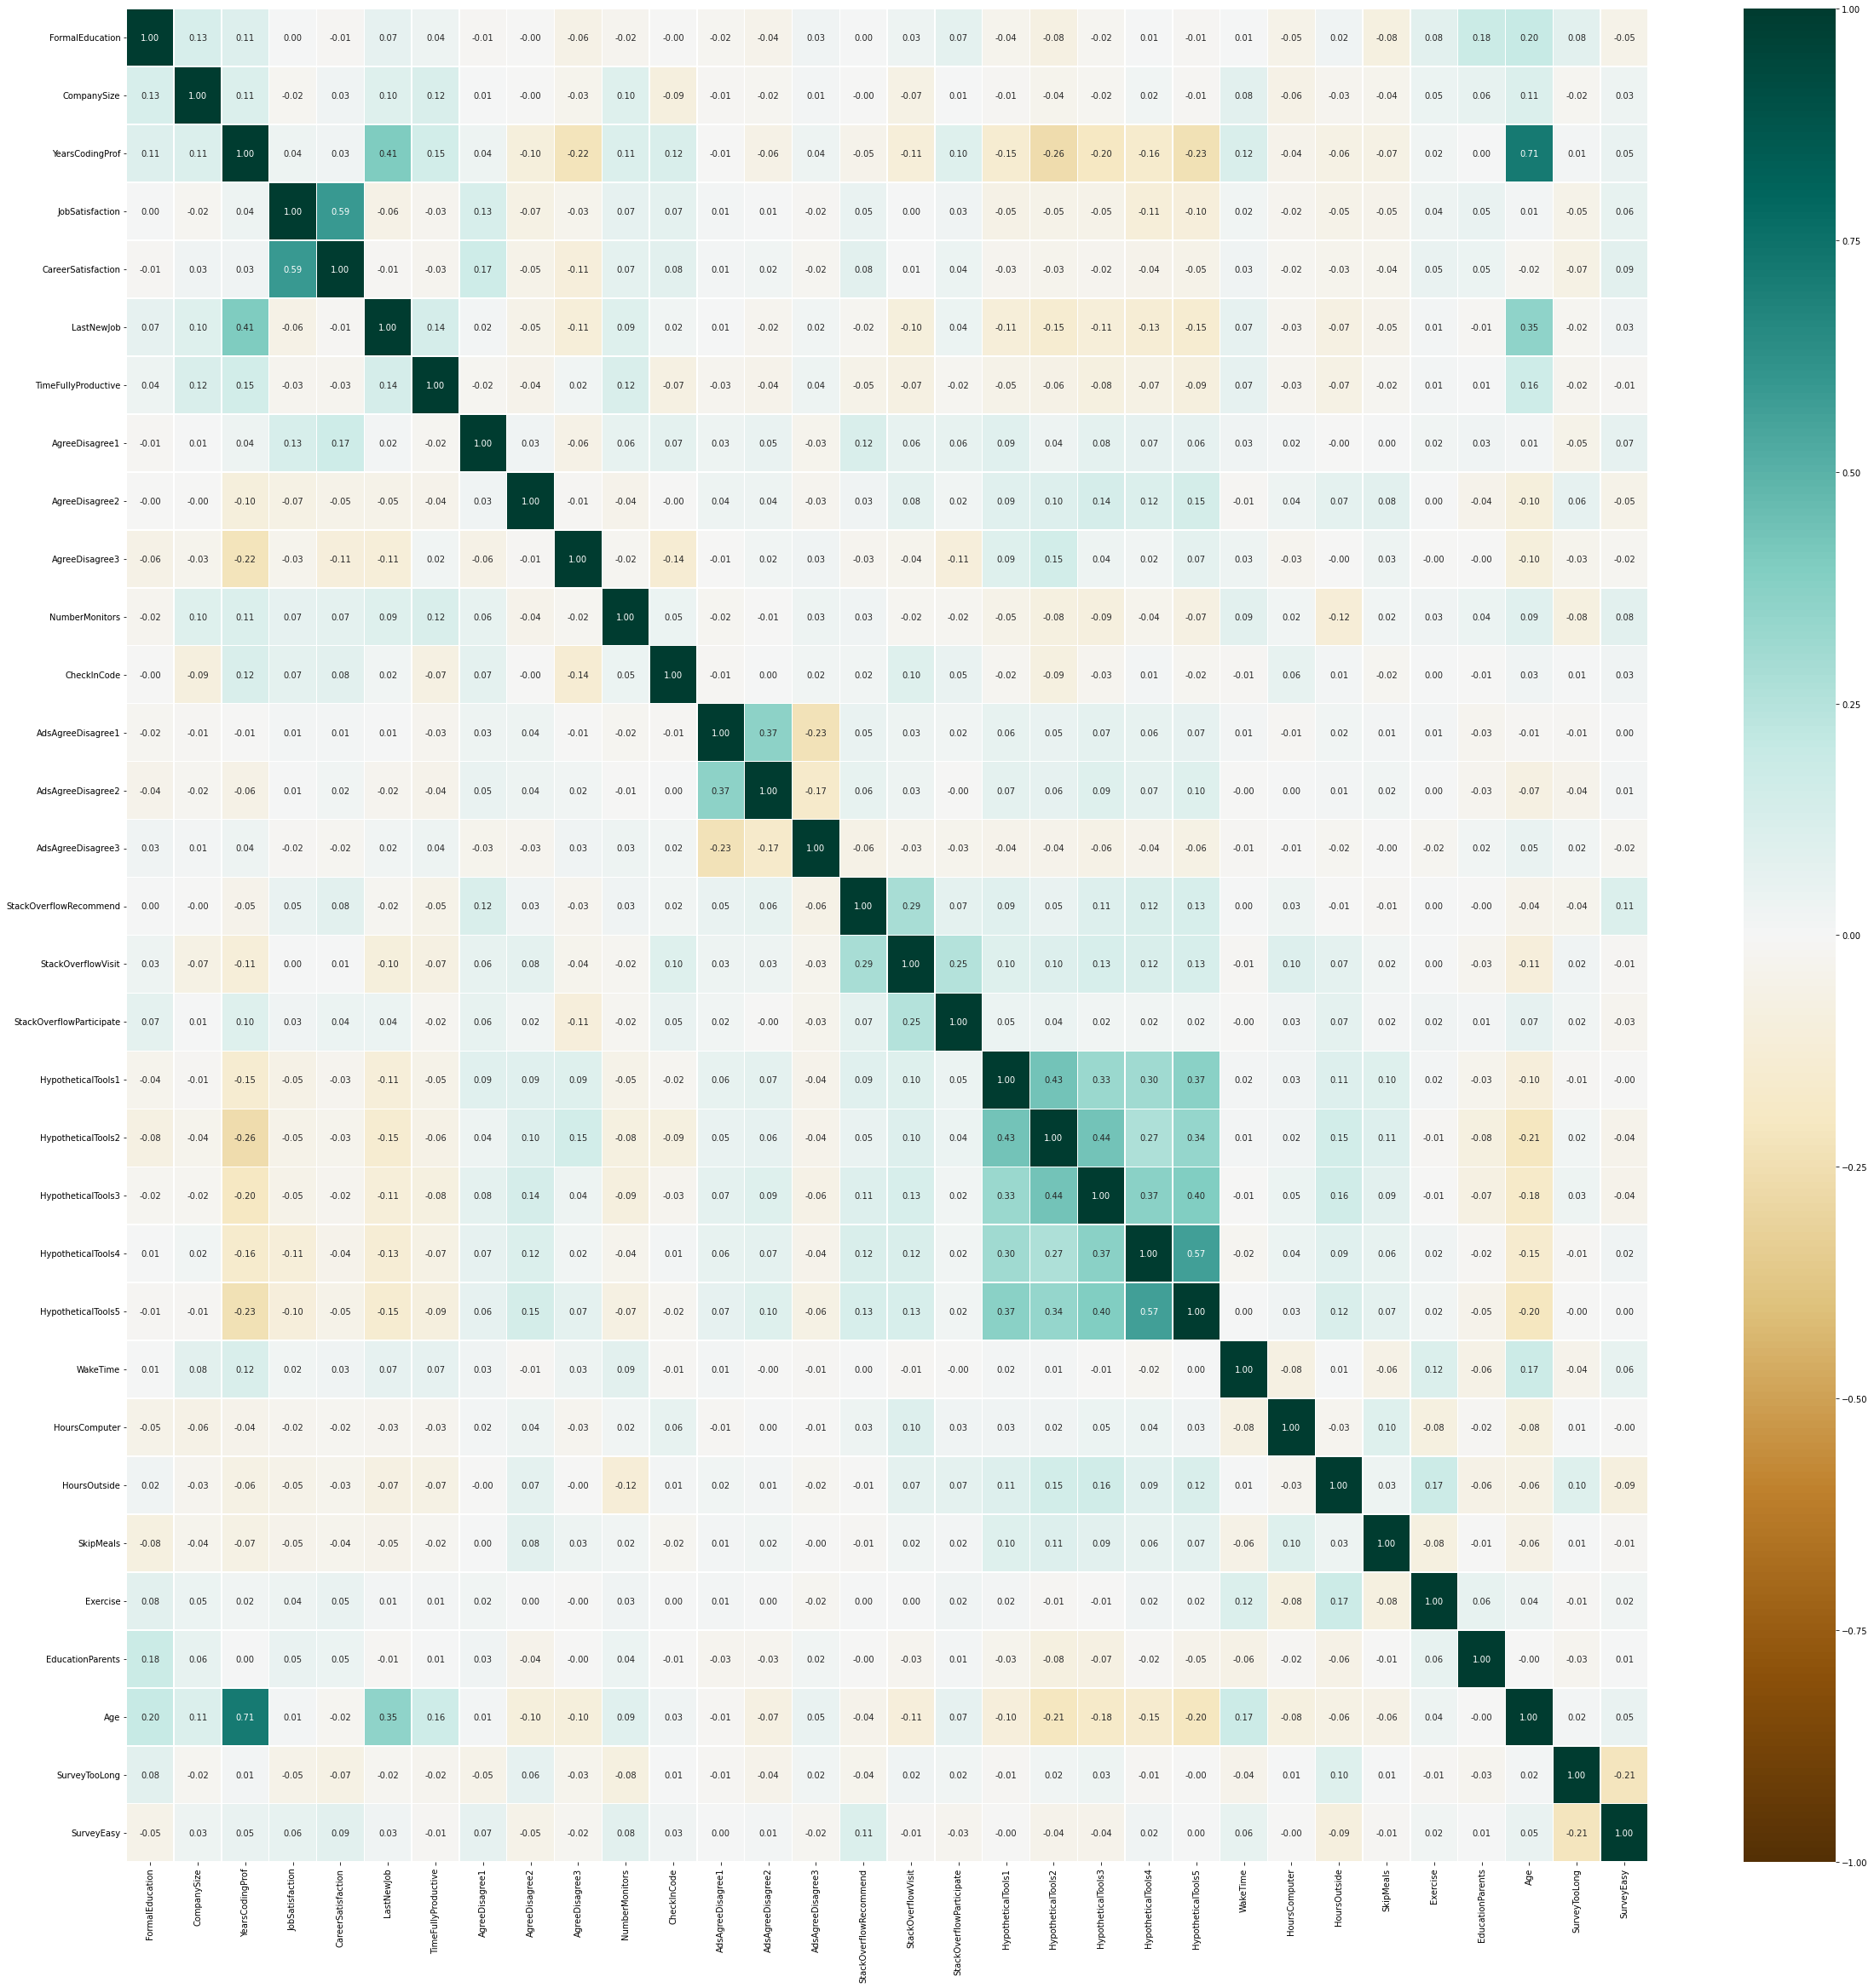

In [ ]:
fig, ax = plt.subplots(figsize=(40,40))
corr1 = df_ordinal_encoding.corr('spearman')
sns.heatmap(corr1, ax=ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

In [ ]:
resuldfHeatmapOrdNumt = pd.concat([df_ordinal_encoding, df['ConvertedSalary']],  axis=1, join="inner")

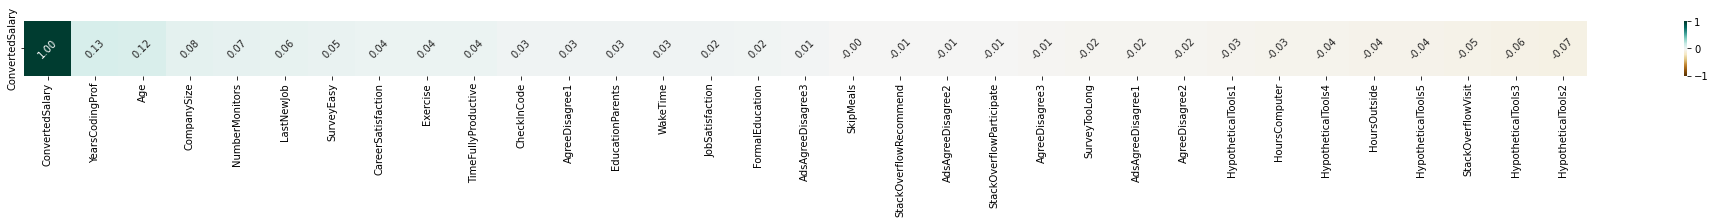

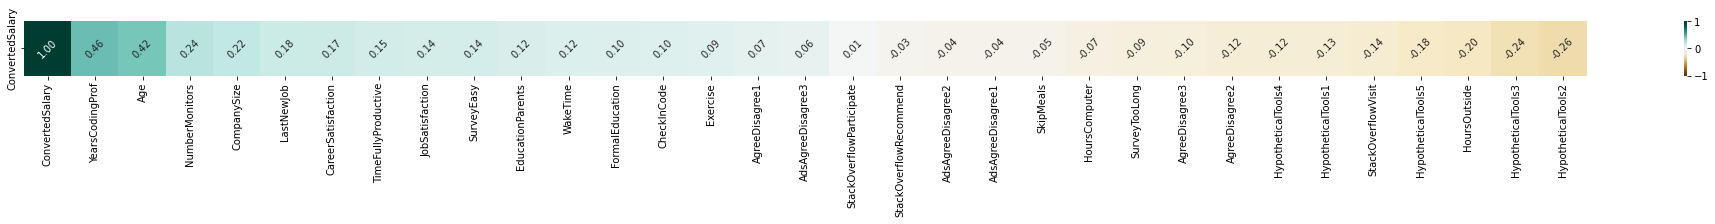

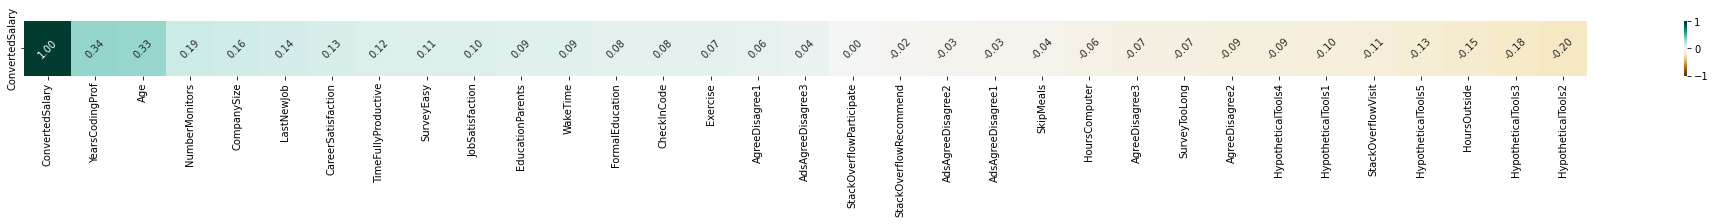

In [ ]:
# Порядковые данные с конвертированной Salary HeatMap
 
for i in ['pearson','spearman', 'kendall']:
    fig, ax = plt.subplots(figsize=(35,1))
    corr1 = resuldfHeatmapOrdNumt.corr(i)[['ConvertedSalary']].sort_values(by='ConvertedSalary', ascending=False )
    sns.heatmap(corr1.T, ax=ax, annot=True, cmap='BrBG', fmt=".2f", vmin=-1, vmax=1, annot_kws={'rotation': 45})

In [ ]:
# Корректные релизы удалены
df.drop(['StackOverflowRecommend','StackOverflowParticipate','AdsAgreeDisagree1','AdsAgreeDisagree2','HoursComputer'], axis=1, inplace=True)

In [ ]:
df.shape

(44999, 113)

HeatMap числовых данных

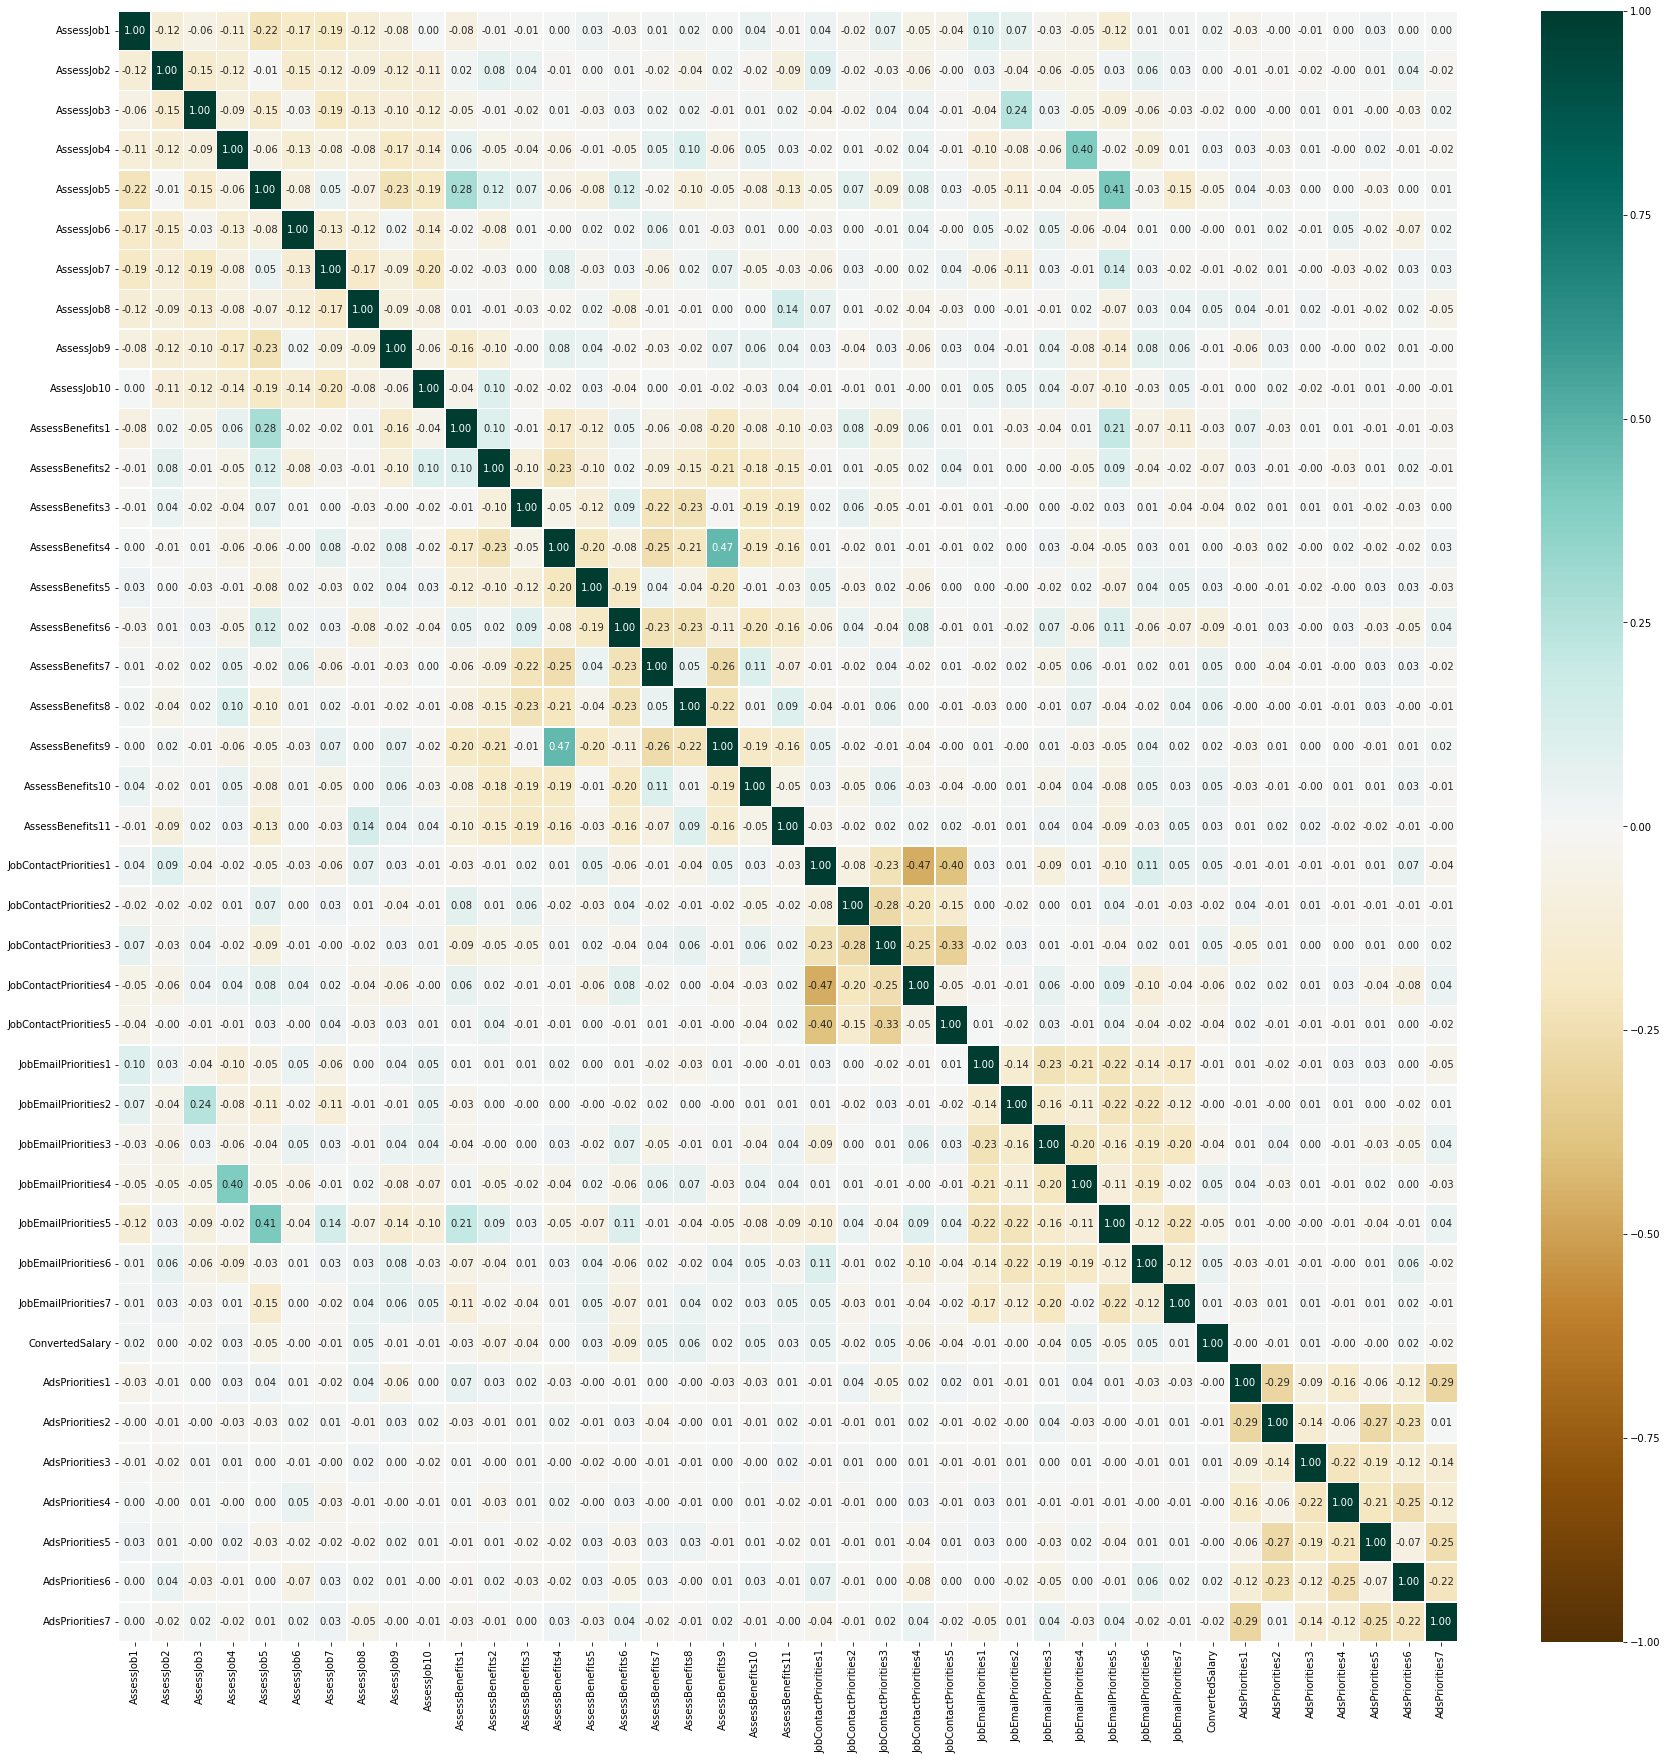

In [ ]:
# Корретнировки между самими числовыми данными.
fig, ax = plt.subplots(figsize=(30,30))
corr1 = df_numerical.corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

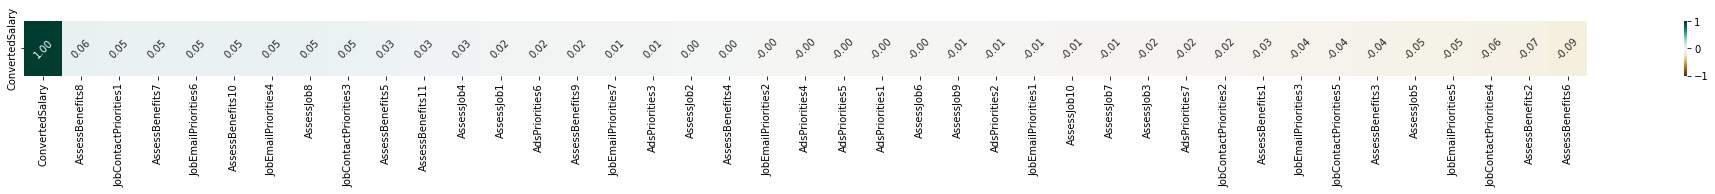

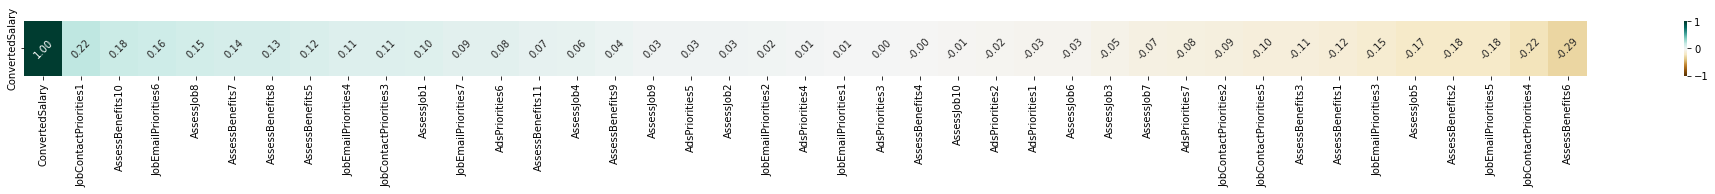

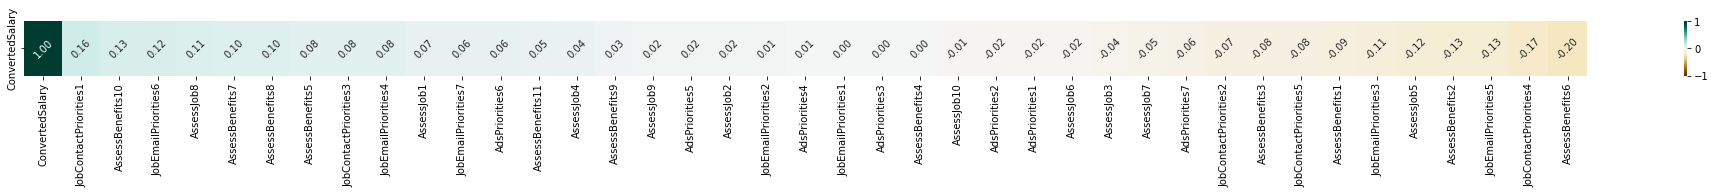

In [ ]:
# Числовые данные с конвертированной Salary HeatMap
for i in ['pearson','spearman', 'kendall']:
    fig, ax = plt.subplots(figsize=(35,1))
    corr1 = df_numerical.corr(i)[['ConvertedSalary']].sort_values(by='ConvertedSalary', ascending=False)
    sns.heatmap(corr1.T, ax=ax, annot=True, cmap='BrBG', fmt=".2f", vmin=-1, vmax=1, annot_kws={'rotation': 45})

In [ ]:
df.drop(['JobEmailPriorities1','JobEmailPriorities2',
         'AdsPriorities1','AdsPriorities2','AdsPriorities3','AdsPriorities4','AdsPriorities5',
         'AssessJob2','AssessJob3','AssessJob4','AssessJob6','AssessJob9',
         'AssessJob10', 'AssessBenefits4','AssessBenefits9'], axis=1, inplace=True)

In [ ]:
df.shape

(44999, 98)

3. Обнаружение выбросов

Визуализация данных о выбросах

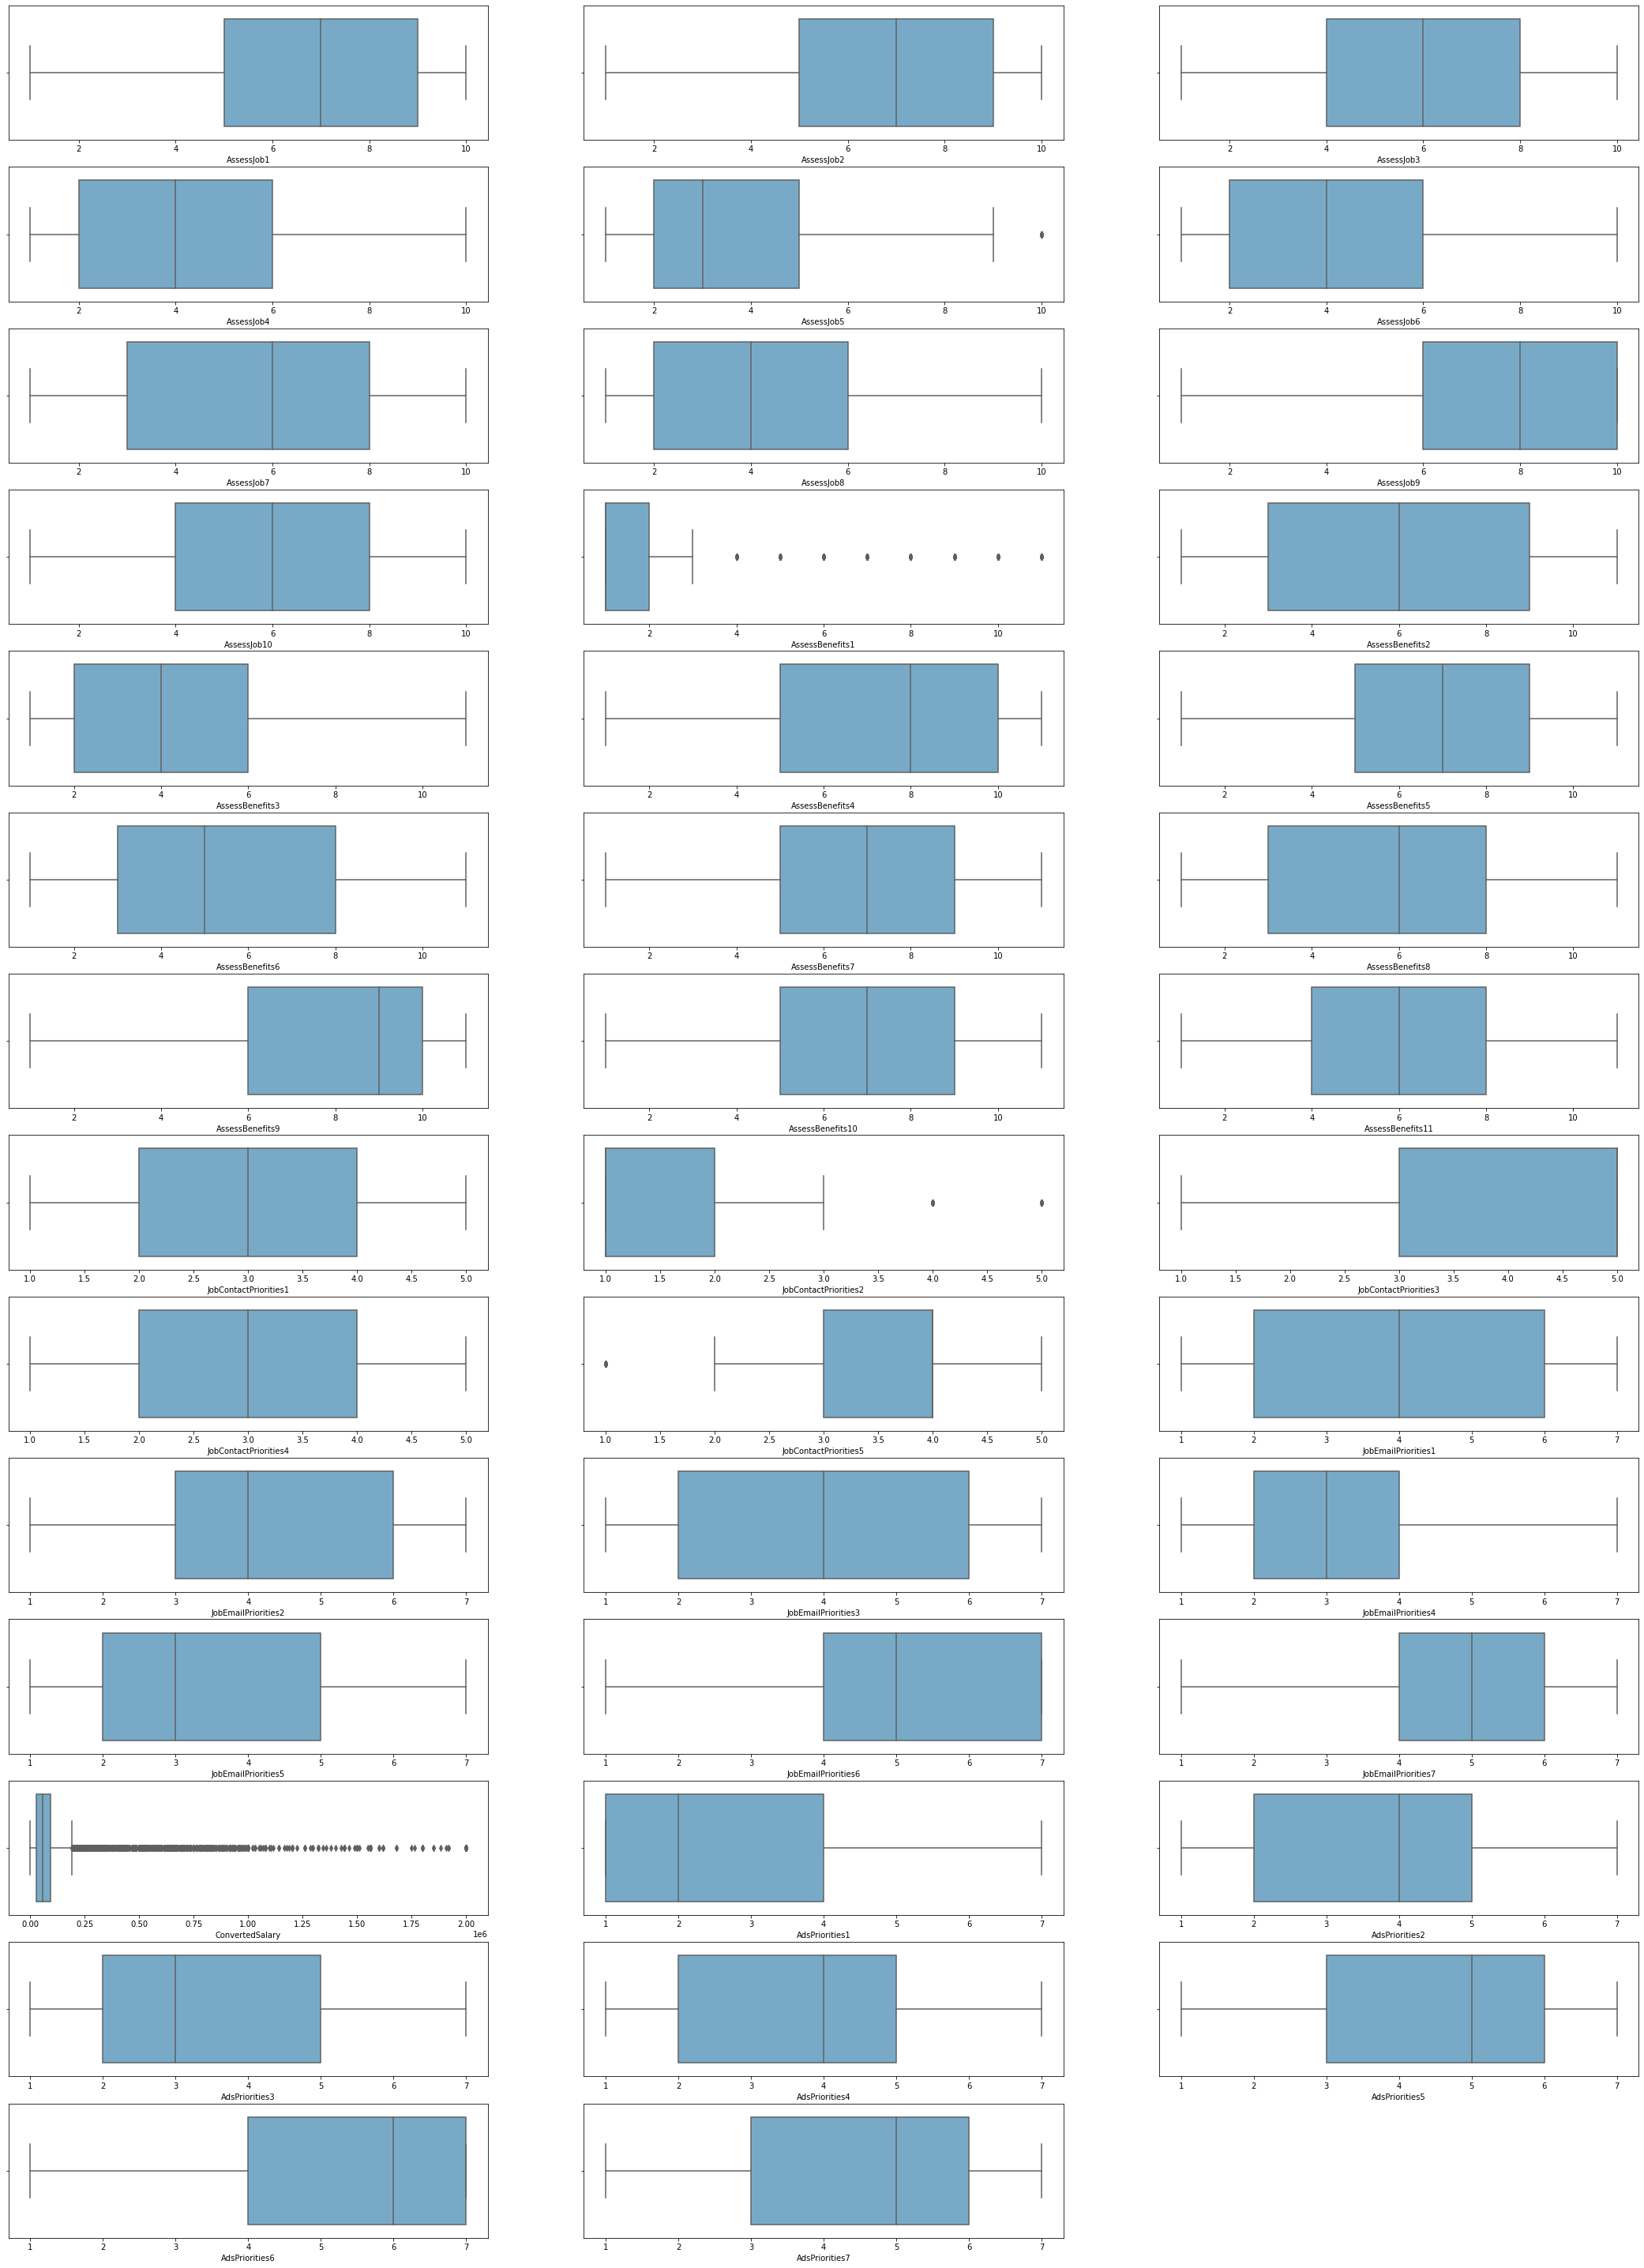

In [ ]:
# Диаграмма выброса всех данных, отображаемых как числовые
i = 1
plt.figure(figsize=(37, 52))
for feature in df_numerical.columns:
    plt.subplot(14, 3, i)
    sns.boxplot(x=df_numerical[feature], palette="Blues")
    i += 1


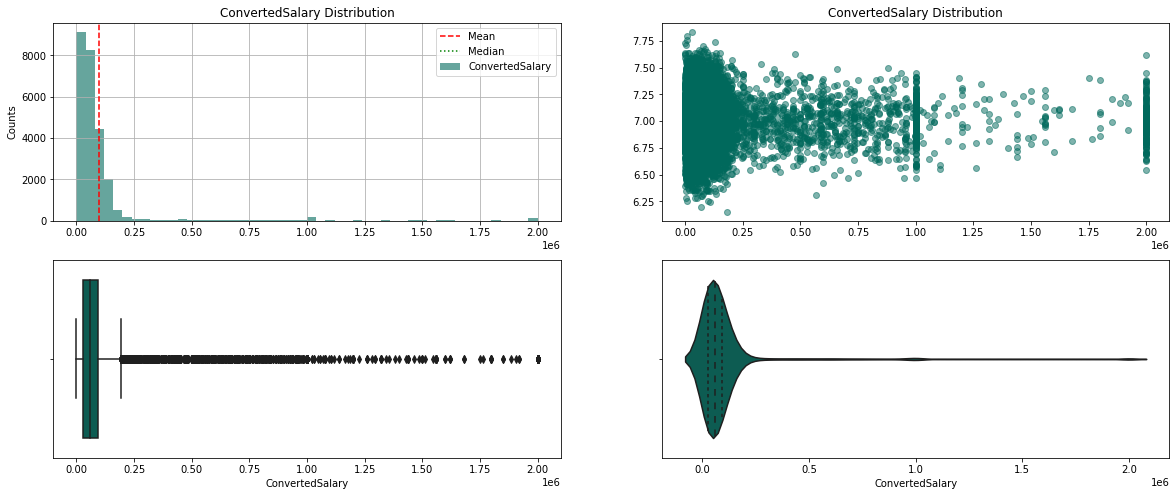

In [ ]:
# Как показано выше, только столбец ConvertedSalary не должен содержать выбросов, и он должен отображаться с 4 различными типами диаграмм, подробно описанных ниже.
data=df

plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
data['ConvertedSalary'].hist(bins=50, label='ConvertedSalary', alpha=0.6, color='#00695C')
plt.axvline(np.mean(data['ConvertedSalary']), ls='--', c='r', label="Mean")
plt.axvline(np.median(data['ConvertedSalary']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("ConvertedSalary Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(data['ConvertedSalary'], np.random.normal(7, 0.2, size=data.shape[0]), alpha=0.5 ,color='#00695C')
plt.title("ConvertedSalary Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(x="ConvertedSalary", data=data ,color='#00695C')

plt.subplot(2, 2, 4)
sns.violinplot(x="ConvertedSalary", data=data, inner="quartile", bw=0.2 ,color='#00695C')

'O' Values Salary Delete

In [ ]:

(df['ConvertedSalary'] == 0).sum()

76

In [ ]:
nul_salary= df.loc[(df["ConvertedSalary"]==0) & ((df["Employment"] == 'Employed full-time')|(df["Employment"] =='Employed part-time'))]
nul_salary.index

Int64Index([   14,   488,  1818,  1963,  2395,  3248,  3720,  4395,  4967,
             6557,  6709,  7211,  7587,  8021,  8783, 11189, 11193, 11729,
            12561, 12711, 13065, 13197, 13477, 14055, 14741, 14996, 16659,
            16995, 18800, 18864, 19283, 19416, 19915, 20605, 21606, 22240,
            22280, 22942, 22994, 24033, 24727, 24920, 25547, 25763, 27745,
            28609, 28969, 30592, 31056, 31508, 32237, 32324, 32421, 32505,
            33666, 33794, 33929, 34388, 34512, 34520, 35208, 35715, 35810,
            35892, 36021, 37911, 38980, 39418, 41328, 41335, 41612, 42261,
            42998, 43355, 43946, 44418],
           dtype='int64')

In [ ]:
df.drop(list(nul_salary.index), axis=0, inplace=True)

In [ ]:
df.shape

(44923, 98)

In [ ]:
df= df.reset_index(drop=True)

1. Z Score

In [ ]:
# Выбросы 2,3,4 и 5 пороговых значений были визуализированы путем выполнения анализа Z-оценки.
def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good

In [ ]:
z_score(df['ConvertedSalary'], threshold=2).sum()

z-score of 2 corresponds to a prob of 0.27%
Rejection 20113 points


24810

z-score of 2 corresponds to a prob of 0.27%
Rejection 20113 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 19890 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 19724 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 19465 points


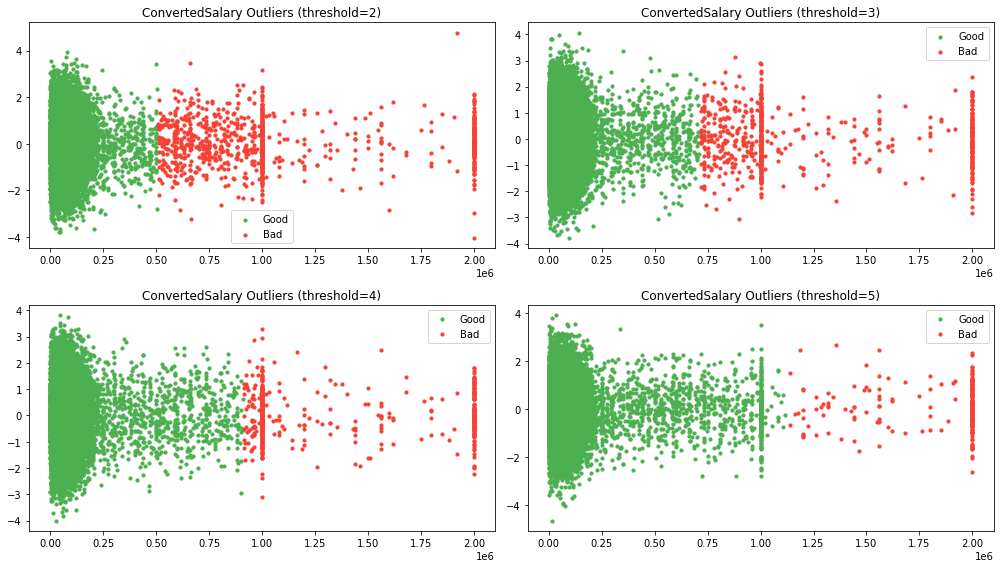

In [ ]:

plt.figure(figsize=(14, 8))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(df['ConvertedSalary'], threshold=threshold)
    plt.scatter(df['ConvertedSalary'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(df['ConvertedSalary'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"ConvertedSalary Outliers (threshold={threshold})")

plt.tight_layout()

In [ ]:
def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [ ]:
out_salary = outliers_z_score(df['ConvertedSalary'])

In [ ]:
import operator
from functools import reduce 

In [ ]:
#df.drop(list(reduce(operator.concat, out_salary)), axis=0, inplace=True)

In [ ]:
#df = df.reset_index(drop=True)

In [ ]:
#df.shape

In [ ]:
#df['ConvertedSalary'].describe().T

2. IQR Method

In [ ]:
#Отфильтровано для значений, которые не преобразованы в NaN заработной платы для анализа выбросов.
filtered_df = df[df['ConvertedSalary'].isnull()]
filtered_df.shape

(19262, 98)

In [ ]:
# IQR yöntemi ile 2633 tane outlier deger tespit edilmistir
def outlier(data):
    global ust_sinir , alt_sinir ,df_table
    df_table = data
    Q1 = df_table.quantile(0.25)
    Q3 = df_table.quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1-1.5*IQR
    ust_sinir = Q3+1.5*IQR
    aykiri_tf = (df_table < alt_sinir) | (df_table > ust_sinir)
    index_aykiri_tf= df_table[aykiri_tf].index
    df_table = pd.DataFrame(df_table)
    df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir)))]
   
    return index_aykiri_tf 

In [ ]:
outlier(df.ConvertedSalary)

Int64Index([    8,    26,   124,   127,   196,   224,   235,   268,   327,
              395,
            ...
            44647, 44678, 44695, 44700, 44715, 44824, 44888, 44905, 44913,
            44920],
           dtype='int64', length=1422)

In [ ]:
#df.drop(list(outlier(df.ConvertedSalary)), axis=0, inplace=True)

In [ ]:
# У нас есть данные с рассчитанным значением перекоса графа RightSkewed Outlier
print(df['ConvertedSalary'].skew())

6.32861070913703


In [ ]:
# Учитывая приведенный выше анализ было принято решение заменить значения после 95% данных данными из той же страны и с тем же опытом, чтобы предотвратить потерю данных.
df['ConvertedSalary'].quantile(0.95)

213000.0

In [ ]:
# В этой таблице показано среднее значение ConvertedSalary для невыпадающих данных по опыту страны.
df_results_public[df_results_public['ConvertedSalary'] < 216000].groupby(["Country", "YearsCodingProf"])['ConvertedSalary'].mean()

Country      YearsCodingProf
Afghanistan  3-5 years          2663.50
Albania      0-2 years          7411.50
             3-5 years         18578.29
             6-8 years         22517.67
Algeria      0-2 years          3156.00
                                 ...   
Yemen        3-5 years          8400.00
             6-8 years         10794.00
Zimbabwe     0-2 years          9000.00
             3-5 years         18210.00
             9-11 years        16800.00
Name: ConvertedSalary, Length: 773, dtype: float64

In [ ]:
df_lower  = df[df['ConvertedSalary'] < 216000]
left      = df[df['ConvertedSalary'] > 216000]
right     = df_lower.groupby(["Country", "YearsCodingProf"])['ConvertedSalary'].mean()
result    = pd.merge(left, right, how="left", on=["Country", "YearsCodingProf"])

In [ ]:
result['ConvertedSalary'] = result['ConvertedSalary_y']
result.drop(['ConvertedSalary_x', 'ConvertedSalary_y'], axis=1, inplace=True)

In [ ]:
# В результате процесса фильтрации 30 данных были возвращены как Nan, которые позже были удалены с другими данными nan ConvertedSalary.
result.ConvertedSalary.isnull().sum()

14

In [ ]:
dfw = result.append(df_lower)
dfw.shape

(25661, 98)

In [ ]:
df = filtered_df.append(dfw)

In [ ]:
#df.loc[outlier, 'ConvertedSalary'] = df.groupby(["Country","YearsCodingProf"])[['ConvertedSalary']].transform(lambda x: x.mean())

In [ ]:
#df.drop(list(outlier(df.ConvertedSalary)), axis=0, inplace=True)

In [ ]:
# пересчитанное значение перекоса
print(df['ConvertedSalary'].skew())

0.7512135876724558


In [ ]:
# Сброс индекса после удаления и заполнения
df= df.reset_index(drop=True)

In [ ]:
df.shape

(44923, 98)

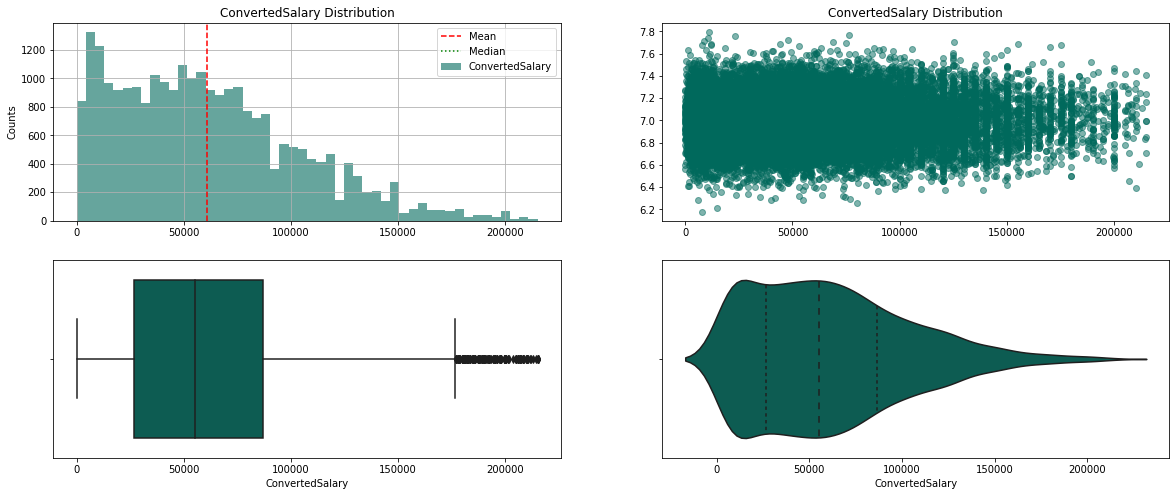

In [ ]:
# Данные снова визуализируются после операций с выбросами
data=df

plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
data['ConvertedSalary'].hist(bins=50, label='ConvertedSalary', alpha=0.6, color='#00695C')
plt.axvline(np.mean(data['ConvertedSalary']), ls='--', c='r', label="Mean")
plt.axvline(np.median(data['ConvertedSalary']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("ConvertedSalary Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(data['ConvertedSalary'], np.random.normal(7, 0.2, size=data.shape[0]), alpha=0.5 ,color='#00695C')
plt.title("ConvertedSalary Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(x="ConvertedSalary", data=data ,color='#00695C')

plt.subplot(2, 2, 4)
sns.violinplot(x="ConvertedSalary", data=data, inner="quartile", bw=0.2 ,color='#00695C')

4. Nan Value Imputation

In [ ]:
newdf = df.select_dtypes(include=np.number)
newdf.head(2)


,FormalEducation,CompanySize,YearsCodingProf,JobSatisfaction,CareerSatisfaction,LastNewJob,AssessJob1,AssessJob5,AssessJob7,AssessJob8,...,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursOutside,SkipMeals,Exercise,EducationParents,Age,SurveyTooLong,SurveyEasy
0,5.00,2,2.00,3.00,3.00,1.00,10.00,2.00,3.00,4.00,...,4.00,4.00,8.00,3.00,0.00,2.00,5.00,2.00,0.00,2.00
1,4.00,2,3.00,2.00,2.00,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
newdf.isna().sum()

FormalEducation         687
CompanySize               0
YearsCodingProf        6161
JobSatisfaction        7047
CareerSatisfaction     6810
                      ...  
Exercise               9988
EducationParents      14533
Age                   13307
SurveyTooLong         12784
SurveyEasy            12823
Length: 53, dtype: int64

In [ ]:
# Корр. с ConvertedSalary без заполнения значений nan.
df_corr_before_nan_value= pd.DataFrame(newdf[newdf.columns[1:]].corr(method='spearman')['ConvertedSalary'][:-1])
#df_corr_before_nan_value.sort_values(by='ConvertedSalary', ascending=False)

In [ ]:
newdf= newdf.reset_index(drop=True)

In [ ]:
# ConvertedSalary отделен от данных, поэтому значения nan заполняются независимо от цели.
X = newdf.drop('ConvertedSalary', 1)
y = newdf['ConvertedSalary']

<ipython-input-106-67ef295a917d>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
edf = X.copy(deep = True)

In [ ]:
# Все данные, используемые при заполнении значений nan

In [ ]:
edf.shape

(44923, 52)

Iterative Imputer

In [ ]:
exEstimator = ExtraTreeRegressor(max_features='sqrt', random_state=42) 
exImputer   = IterativeImputer(estimator=exEstimator, imputation_order='random', verbose = 2 , max_iter = 15 , tol= 1e-10 )
exImputer.fit(edf)

[IterativeImputer] Completing matrix with shape (44923, 52)
[IterativeImputer] Ending imputation round 1/15, elapsed time 4.72
[IterativeImputer] Change: 100.56229451261437, scaled tolerance: 1.1000000000000001e-09 
[IterativeImputer] Ending imputation round 2/15, elapsed time 9.13
[IterativeImputer] Change: 131.0, scaled tolerance: 1.1000000000000001e-09 
[IterativeImputer] Ending imputation round 3/15, elapsed time 13.56
[IterativeImputer] Change: 135.0, scaled tolerance: 1.1000000000000001e-09 
[IterativeImputer] Ending imputation round 4/15, elapsed time 18.25
[IterativeImputer] Change: 133.0, scaled tolerance: 1.1000000000000001e-09 
[IterativeImputer] Ending imputation round 5/15, elapsed time 22.83
[IterativeImputer] Change: 135.0, scaled tolerance: 1.1000000000000001e-09 
[IterativeImputer] Ending imputation round 6/15, elapsed time 27.48
[IterativeImputer] Change: 135.0, scaled tolerance: 1.1000000000000001e-09 
[IterativeImputer] Ending imputation round 7/15, elapsed time 31.

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



IterativeImputer(estimator=ExtraTreeRegressor(max_features='sqrt',
                                              random_state=42),
                 imputation_order='random', max_iter=15, tol=1e-10, verbose=2)

In [ ]:
exTrans = pd.DataFrame(exImputer.transform(edf), columns=edf.columns)
exTrans.head(3)

[IterativeImputer] Completing matrix with shape (44923, 52)
[IterativeImputer] Ending imputation round 1/15, elapsed time 0.63
[IterativeImputer] Ending imputation round 2/15, elapsed time 1.43
[IterativeImputer] Ending imputation round 3/15, elapsed time 2.05
[IterativeImputer] Ending imputation round 4/15, elapsed time 2.70
[IterativeImputer] Ending imputation round 5/15, elapsed time 3.33
[IterativeImputer] Ending imputation round 6/15, elapsed time 3.97
[IterativeImputer] Ending imputation round 7/15, elapsed time 4.60
[IterativeImputer] Ending imputation round 8/15, elapsed time 5.24
[IterativeImputer] Ending imputation round 9/15, elapsed time 5.86
[IterativeImputer] Ending imputation round 10/15, elapsed time 6.49
[IterativeImputer] Ending imputation round 11/15, elapsed time 7.13
[IterativeImputer] Ending imputation round 12/15, elapsed time 7.84
[IterativeImputer] Ending imputation round 13/15, elapsed time 8.56
[IterativeImputer] Ending imputation round 14/15, elapsed time 9.

,FormalEducation,CompanySize,YearsCodingProf,JobSatisfaction,CareerSatisfaction,LastNewJob,AssessJob1,AssessJob5,AssessJob7,AssessJob8,...,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursOutside,SkipMeals,Exercise,EducationParents,Age,SurveyTooLong,SurveyEasy
0,5.00,2.00,2.00,3.00,3.00,1.00,10.00,2.00,3.00,4.00,...,4.00,4.00,8.00,3.00,0.00,2.00,5.00,2.00,0.00,2.00
1,4.00,2.00,3.00,2.00,2.00,1.00,3.00,1.00,4.00,3.00,...,1.00,2.00,8.00,2.00,0.00,1.00,2.00,1.00,0.00,0.00
2,5.00,3.00,5.00,0.00,-1.00,1.00,9.00,1.00,8.00,6.00,...,2.00,2.00,7.00,1.00,2.00,0.00,3.00,3.00,0.00,1.00


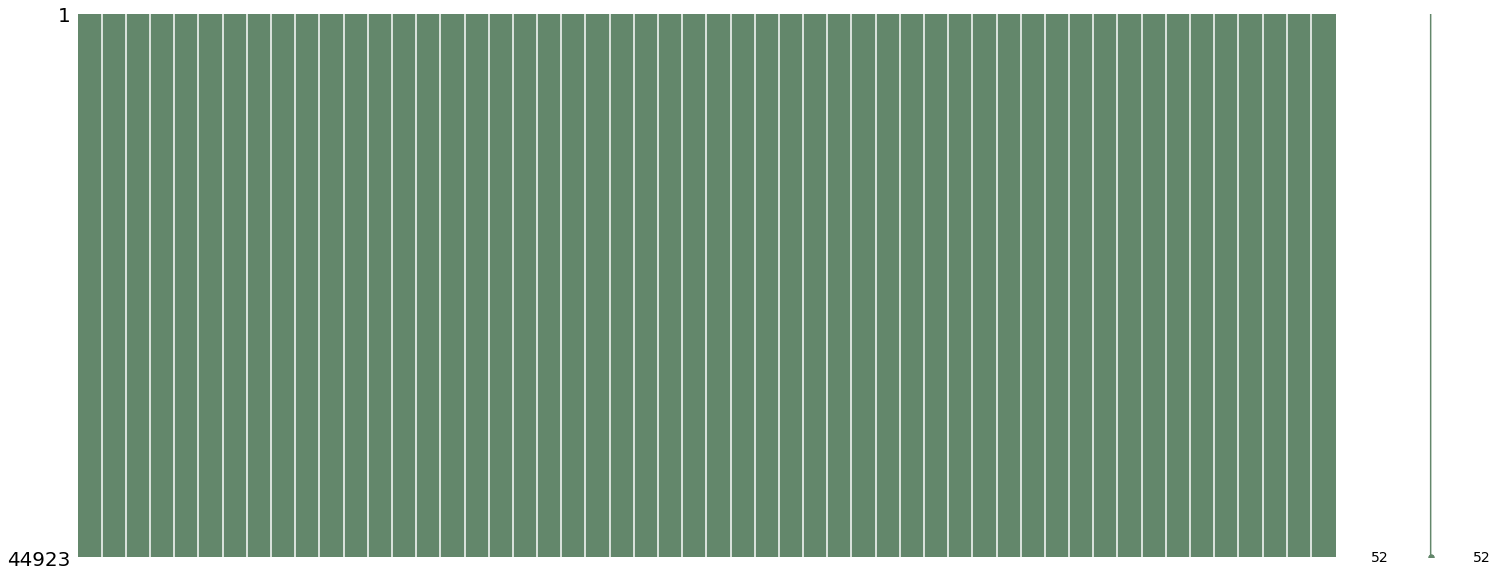

In [ ]:
# визуализация заполненных данных
msno.matrix(exTrans, color=(0.39, 0.53, 0.42))

In [ ]:
# Подтверждение того, все ли значения заполнены
exTrans.isnull().sum().sum()

0

In [ ]:
df_trans = exTrans.copy(deep=True)

In [ ]:
# Повторное сопоставление конвертированных зарплат, которые мы отложили для заполнения значений nan
df_trans = pd.concat([df_trans, y.reindex(df_trans.index)], axis=1)
df_trans.shape

(44923, 53)

In [ ]:
# Корреляция, пересчитанная после заполнения значения Nan
df_corr_after_nan_value= pd.DataFrame(df_trans[df_trans.columns[1:]].corr(method='spearman')['ConvertedSalary'][:-1])
df_corr_after_nan_value.sort_values(by='ConvertedSalary', ascending=False)

,ConvertedSalary
YearsCodingProf,0.49
Age,0.44
NumberMonitors,0.24
CompanySize,0.23
AssessBenefits10,0.20
...,...
HypotheticalTools5,-0.18
HoursOutside,-0.22
HypotheticalTools3,-0.24
HypotheticalTools2,-0.27


In [ ]:
# сравнение до и после здесь
result_corr = pd.concat([df_corr_before_nan_value, df_corr_after_nan_value], axis=1)
result_corr

,ConvertedSalary,ConvertedSalary
CompanySize,0.23,0.23
YearsCodingProf,0.49,0.49
JobSatisfaction,0.15,0.15
CareerSatisfaction,0.18,0.18
LastNewJob,0.19,0.19
...,...,...
Exercise,0.09,0.09
EducationParents,0.13,0.12
Age,0.45,0.44
SurveyTooLong,-0.10,-0.10


5. Feature Engineering

Language Worked With Salary

In [ ]:
def feature_eng(num):
    num = float("{:.3g}".format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    result = "{}{}".format("{:f}".format(num).rstrip("0").rstrip('.'), ["", "K", "M", "B", "T"][magnitude])
    return result

In [ ]:
# Фильтруем и извлекаем значения в столбце `LanguageWorkedWith`
lang_sal_df = df[(df["Student"] == 'No')][["LanguageWorkedWith", "ConvertedSalary"]]
lang_sal_df["LanguageWorkedWith"] = lang_sal_df["LanguageWorkedWith"].str.split(";")
lang_sal_df = lang_sal_df.explode("LanguageWorkedWith")

# Чистим nan значения
lang_sal_df = lang_sal_df.dropna(how="any", axis=0)

# Агрегируем по языку и рассчитываем медиану зарплаты
lang_sal_df = lang_sal_df.groupby(["LanguageWorkedWith"]).median()["ConvertedSalary"].sort_values()
lang_sal_df = pd.DataFrame({"LanguageWorkedWith": lang_sal_df.index,  "ConvertedSalary": lang_sal_df.values})
lang_sal_df.rename(columns={"LanguageWorkedWith": "Coding Languague"}, inplace=True)

# Создаём новый столбец метки, используемый для визуализации
lang_sal_df["Label"] = lang_sal_df.apply(lambda row: "$" + feature_eng(round(row["ConvertedSalary"], 0)), axis=1)

fig = px.bar( lang_sal_df, 
              width=900, height=800, 
              x="ConvertedSalary", y="Coding Languague", 
              orientation="h", 
              title="Language vs Salary", text="Label", color="ConvertedSalary",)
fig.show()

Dev. Type With Salary

In [ ]:
# Фильтруем профессионального разработчика и извлекаем тип разработчика из столбца DevType
dev_sal_df = df[["DevType", "ConvertedSalary"]]
dev_sal_df = dev_sal_df.dropna(how="any", axis=0)
dev_sal_df["DevType"] = dev_sal_df["DevType"].str.split(";")
dev_sal_df = dev_sal_df.explode("DevType")

#Получаем медианную группу зарплат по DevType
dev_sal_df = dev_sal_df.groupby(["DevType"]).median()["ConvertedSalary"].sort_values(ascending=False)
dev_sal_df = pd.DataFrame({"DevType": dev_sal_df.index,  "ConvertedSalary": dev_sal_df.values})

# Создаём столбец Label, используемый для визуализации
dev_sal_df["Label"] = dev_sal_df.apply(lambda row: "$" + feature_eng(round(row["ConvertedSalary"], 0)), axis=1)

fig = px.bar(dev_sal_df,
             width=1000, height=700, 
             x="ConvertedSalary", y="DevType", 
             title="Salary vs Dev Type", text="Label", color="DevType")

fig.show()


Создание новых функций из существующих функций

In [ ]:
# Новый столбец был получен путем подсчета функций в столбцах, таких как commitontools, languageworked with, но был включен \только лучший CommunicationTools_Count, потому что корреляция других была очень низкой.
df['CommunicationTools_Count'] = df['CommunicationTools'].str.count(';') + 1

In [ ]:
df_count= df[['CommunicationTools_Count','ConvertedSalary']]
df_count.corr('spearman').T

,CommunicationTools_Count,ConvertedSalary
CommunicationTools_Count,1.00,0.17
ConvertedSalary,0.17,1.00


In [ ]:
df[['CommunicationTools_Count']] = df[['CommunicationTools_Count']].fillna(value=0)

In [ ]:
df_trans= pd.concat([df['CommunicationTools_Count'], df_trans], axis=1)

In [ ]:
df_trans.shape

(44923, 54)

Categorik Nominal Data get_dummies

In [ ]:
listem=['Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'UndergradMajor', 'UpdateCV','DevType', 'HopeFiveYears', 'JobSearchStatus',
        'CommunicationTools', 'EducationTypes', 'SelfTaughtTypes','LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 
        'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE', 
        'OperatingSystem', 'Methodology', 'VersionControl', 'AdBlocker',   'AdBlockerDisable', 'AdsActions', 'AIDangerous', 'AIInteresting',
        'AIResponsible', 'EthicsReport', 'EthicsResponsible', 'EthicalImplications', 'StackOverflowHasAccount', 'StackOverflowJobs',
        'StackOverflowDevStory', 'StackOverflowConsiderMember', 'Gender', 'SexualOrientation', 'RaceEthnicity',
        'Dependents', 'EthicsChoice','AIFuture']
        
for i in listem:
  gd_df_x = df[i].str.get_dummies(sep=';').add_prefix(i+'_')
  df_trans= pd.concat([gd_df_x, df_trans], axis=1, join='inner')

6. Feature Selection

In [ ]:
df_last =  df_trans.copy(deep = True)

In [ ]:
#Значения ConvertedSalary nan упали
df_last = df_last.dropna(subset=['ConvertedSalary'])

In [ ]:
df_last.isnull().sum().sum()

0

In [ ]:
X = df_last.drop('ConvertedSalary', axis=1)
y = df_last['ConvertedSalary']

In [ ]:
print(y.shape, X.shape)

(25647,) (25647, 603)


In [ ]:
# FeatureSelection сделан с использованием метода регрессии взаимной информации
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fit = fs.fit(X, y)

In [ ]:
df_feat=pd.DataFrame(fs.scores_, X.columns)
df_feat.sort_values(by=0 , ascending=False)

,0
Country_United States,0.47
YearsCodingProf,0.26
Country_United Kingdom,0.22
Country_India,0.21
RaceEthnicity_White or of European descent,0.15
...,...
Country_Jamaica,0.00
Country_Kyrgyzstan,0.00
Country_Lesotho,0.00
Country_Liechtenstein,0.00


In [ ]:
# визуализация топ-50 самых эффективных колонок
feature_imp     = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top150_feature  = feature_imp.nlargest(n=50, columns=['Score'])

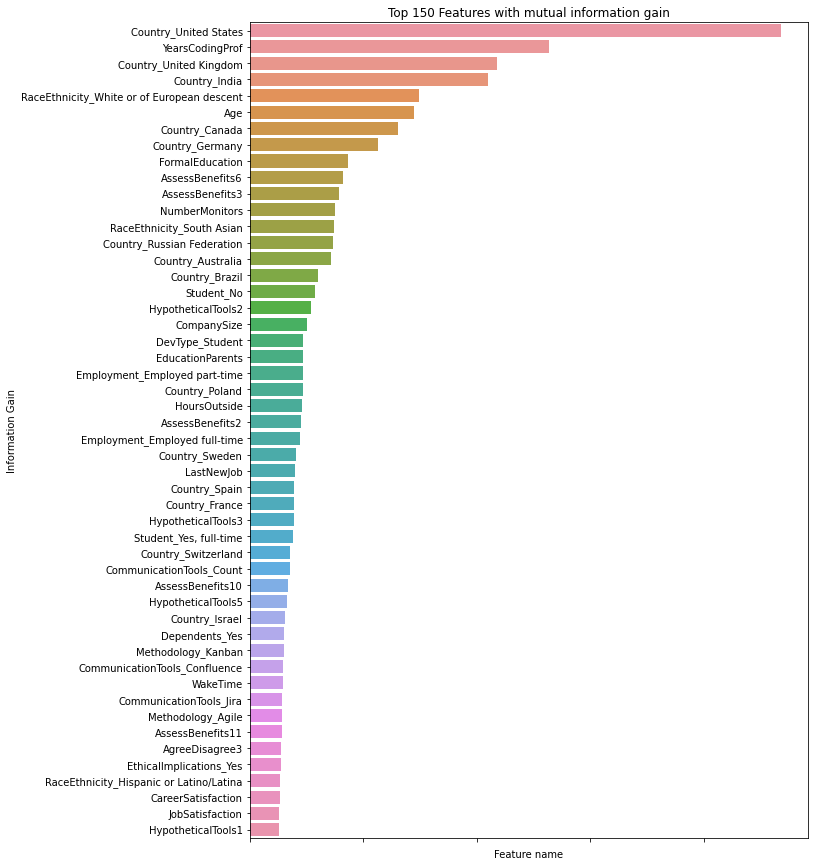

In [ ]:
plt.figure(figsize=(10,15))
g = sns.barplot(y=top150_feature.index, x=top150_feature['Score'])
p = plt.title('Top 150 Features with mutual information gain')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

<ipython-input-136-9466fc824888>:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



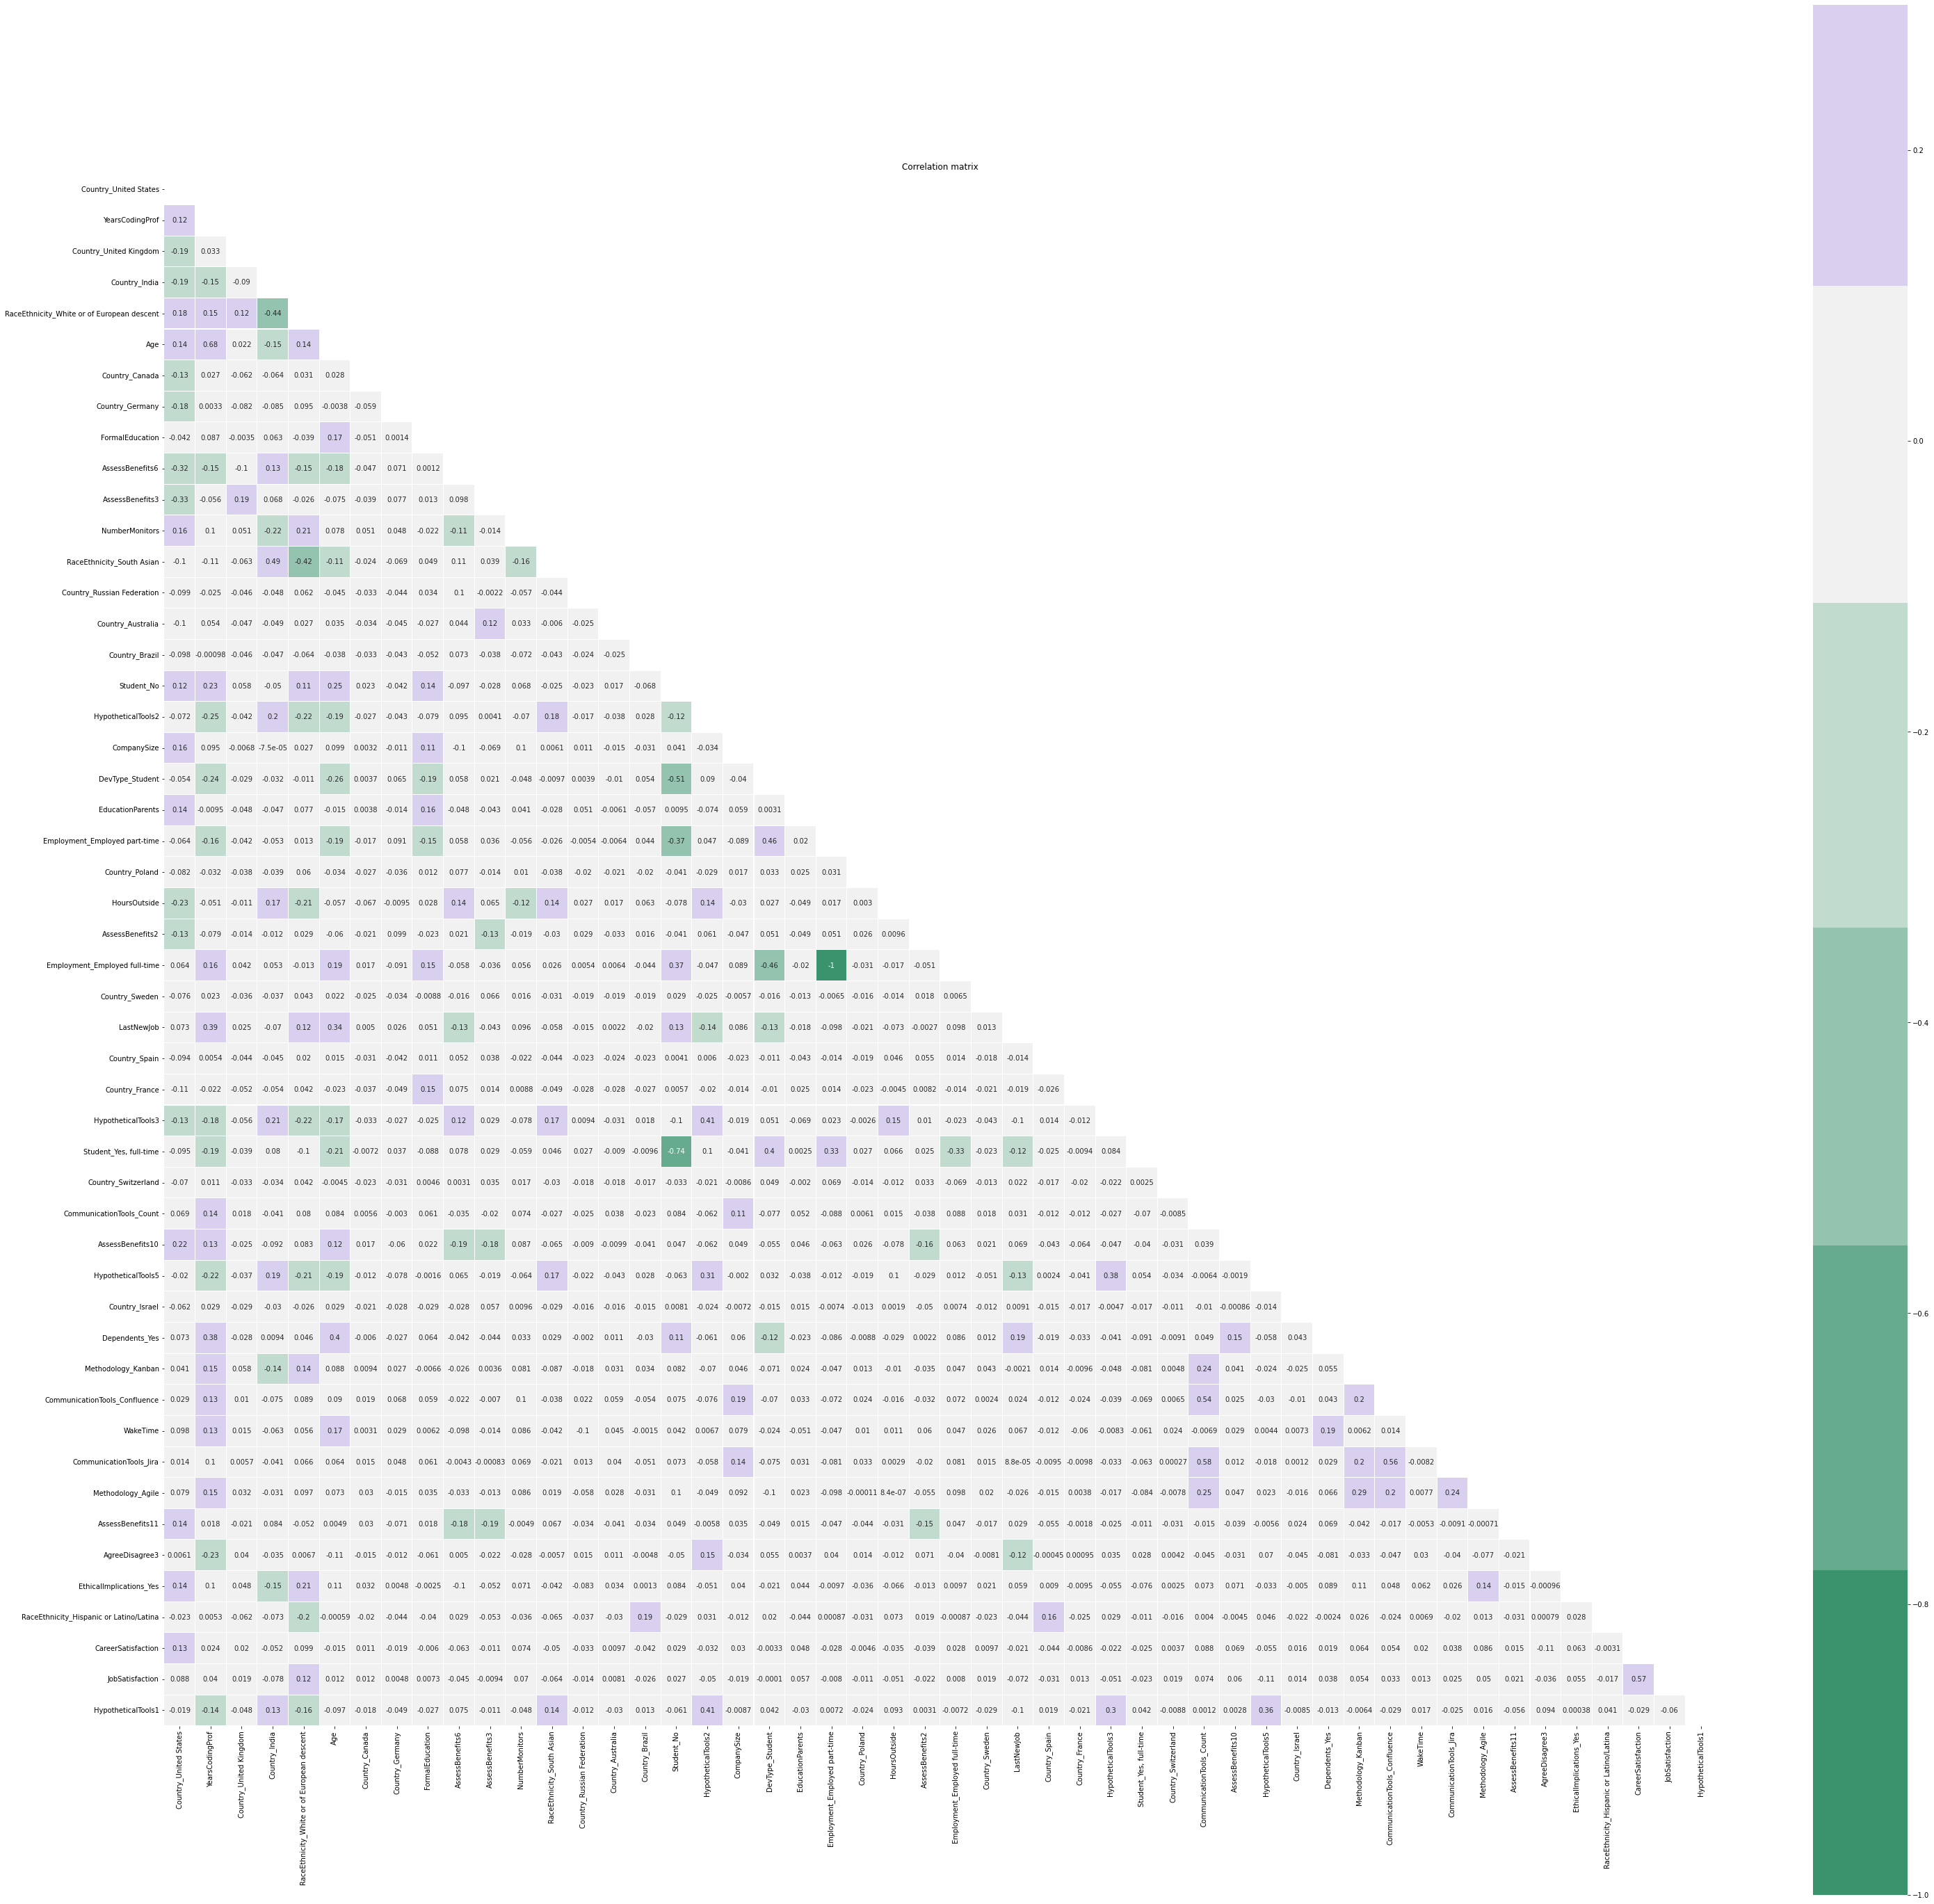

In [ ]:
# Более высокие были исключены на основе корреляции этих 50 столбцов друг с другом.
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
plt.figure(figsize=(50, 50))
corr = X[top150_feature.index].corr('spearman')

# Создаём маску для верхнего треугольника
mask = np.triu(np.ones_like(corr, dtype=np.bool))
g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix')

In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(corr, .75)

Employment_Employed part-time               Employment_Employed full-time                -1.00
Student_No                                  Student_Yes, full-time                       -0.96
DevType_Student                             Student_No                                   -0.86
RaceEthnicity_White or of European descent  Country_India                                -0.81
Employment_Employed full-time               DevType_Student                              -0.81
RaceEthnicity_South Asian                   RaceEthnicity_White or of European descent   -0.78
HypotheticalTools2                          HypotheticalTools1                            0.77
HypotheticalTools3                          HypotheticalTools2                            0.78
Student_Yes, full-time                      DevType_Student                               0.79
DevType_Student                             Employment_Employed part-time                 0.81
RaceEthnicity_South Asian                   Countr

In [ ]:
X = X[top150_feature.index]

In [ ]:
list(X.columns)

['Country_United States',
 'YearsCodingProf',
 'Country_United Kingdom',
 'Country_India',
 'RaceEthnicity_White or of European descent',
 'Age',
 'Country_Canada',
 'Country_Germany',
 'FormalEducation',
 'AssessBenefits6',
 'AssessBenefits3',
 'NumberMonitors',
 'RaceEthnicity_South Asian',
 'Country_Russian Federation',
 'Country_Australia',
 'Country_Brazil',
 'Student_No',
 'HypotheticalTools2',
 'CompanySize',
 'DevType_Student',
 'EducationParents',
 'Employment_Employed part-time',
 'Country_Poland',
 'HoursOutside',
 'AssessBenefits2',
 'Employment_Employed full-time',
 'Country_Sweden',
 'LastNewJob',
 'Country_Spain',
 'Country_France',
 'HypotheticalTools3',
 'Student_Yes, full-time',
 'Country_Switzerland',
 'CommunicationTools_Count',
 'AssessBenefits10',
 'HypotheticalTools5',
 'Country_Israel',
 'Dependents_Yes',
 'Methodology_Kanban',
 'CommunicationTools_Confluence',
 'WakeTime',
 'CommunicationTools_Jira',
 'Methodology_Agile',
 'AssessBenefits11',
 'AgreeDisagree3',

In [ ]:
X = X[['Country_United States',
 'YearsCodingProf',
 'Country_United Kingdom',
 'Country_India',
 'Age',
 'RaceEthnicity_White or of European descent',
 'Country_Canada',
 'Country_Germany',
 'FormalEducation',
 'Employment_Employed full-time',
 'NumberMonitors',
 'Country_Australia',
 'AssessBenefits6',
 'RaceEthnicity_South Asian',
 'DevType_Student',
 'AssessBenefits3',
 'Country_Russian Federation',
 'LastNewJob',
 'CommunicationTools_Count',
 'Student_No',
 'Country_Brazil',
 'Country_Poland',
 'HypotheticalTools2',
 'HoursOutside',
 'Student_Yes, full-time',
 'AssessBenefits2',
 'Country_France',
 'HypotheticalTools3',
 'Methodology_Agile',
 'Country_Sweden',
 'EducationParents',
 'Country_Switzerland',
 'CommunicationTools_Jira',
 'WakeTime',
 'Country_Spain',
 'AssessBenefits10',
 'CommunicationTools_Confluence',
 'HypotheticalTools5',
 'Dependents_Yes',
 'Methodology_Kanban',
 'CompanySize',
 'Employment_Employed part-time',
 'RaceEthnicity_Hispanic or Latino/Latina',
 'Country_Israel',
 'EthicalImplications_Yes']]

<ipython-input-143-b92f2b1b4e0c>:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



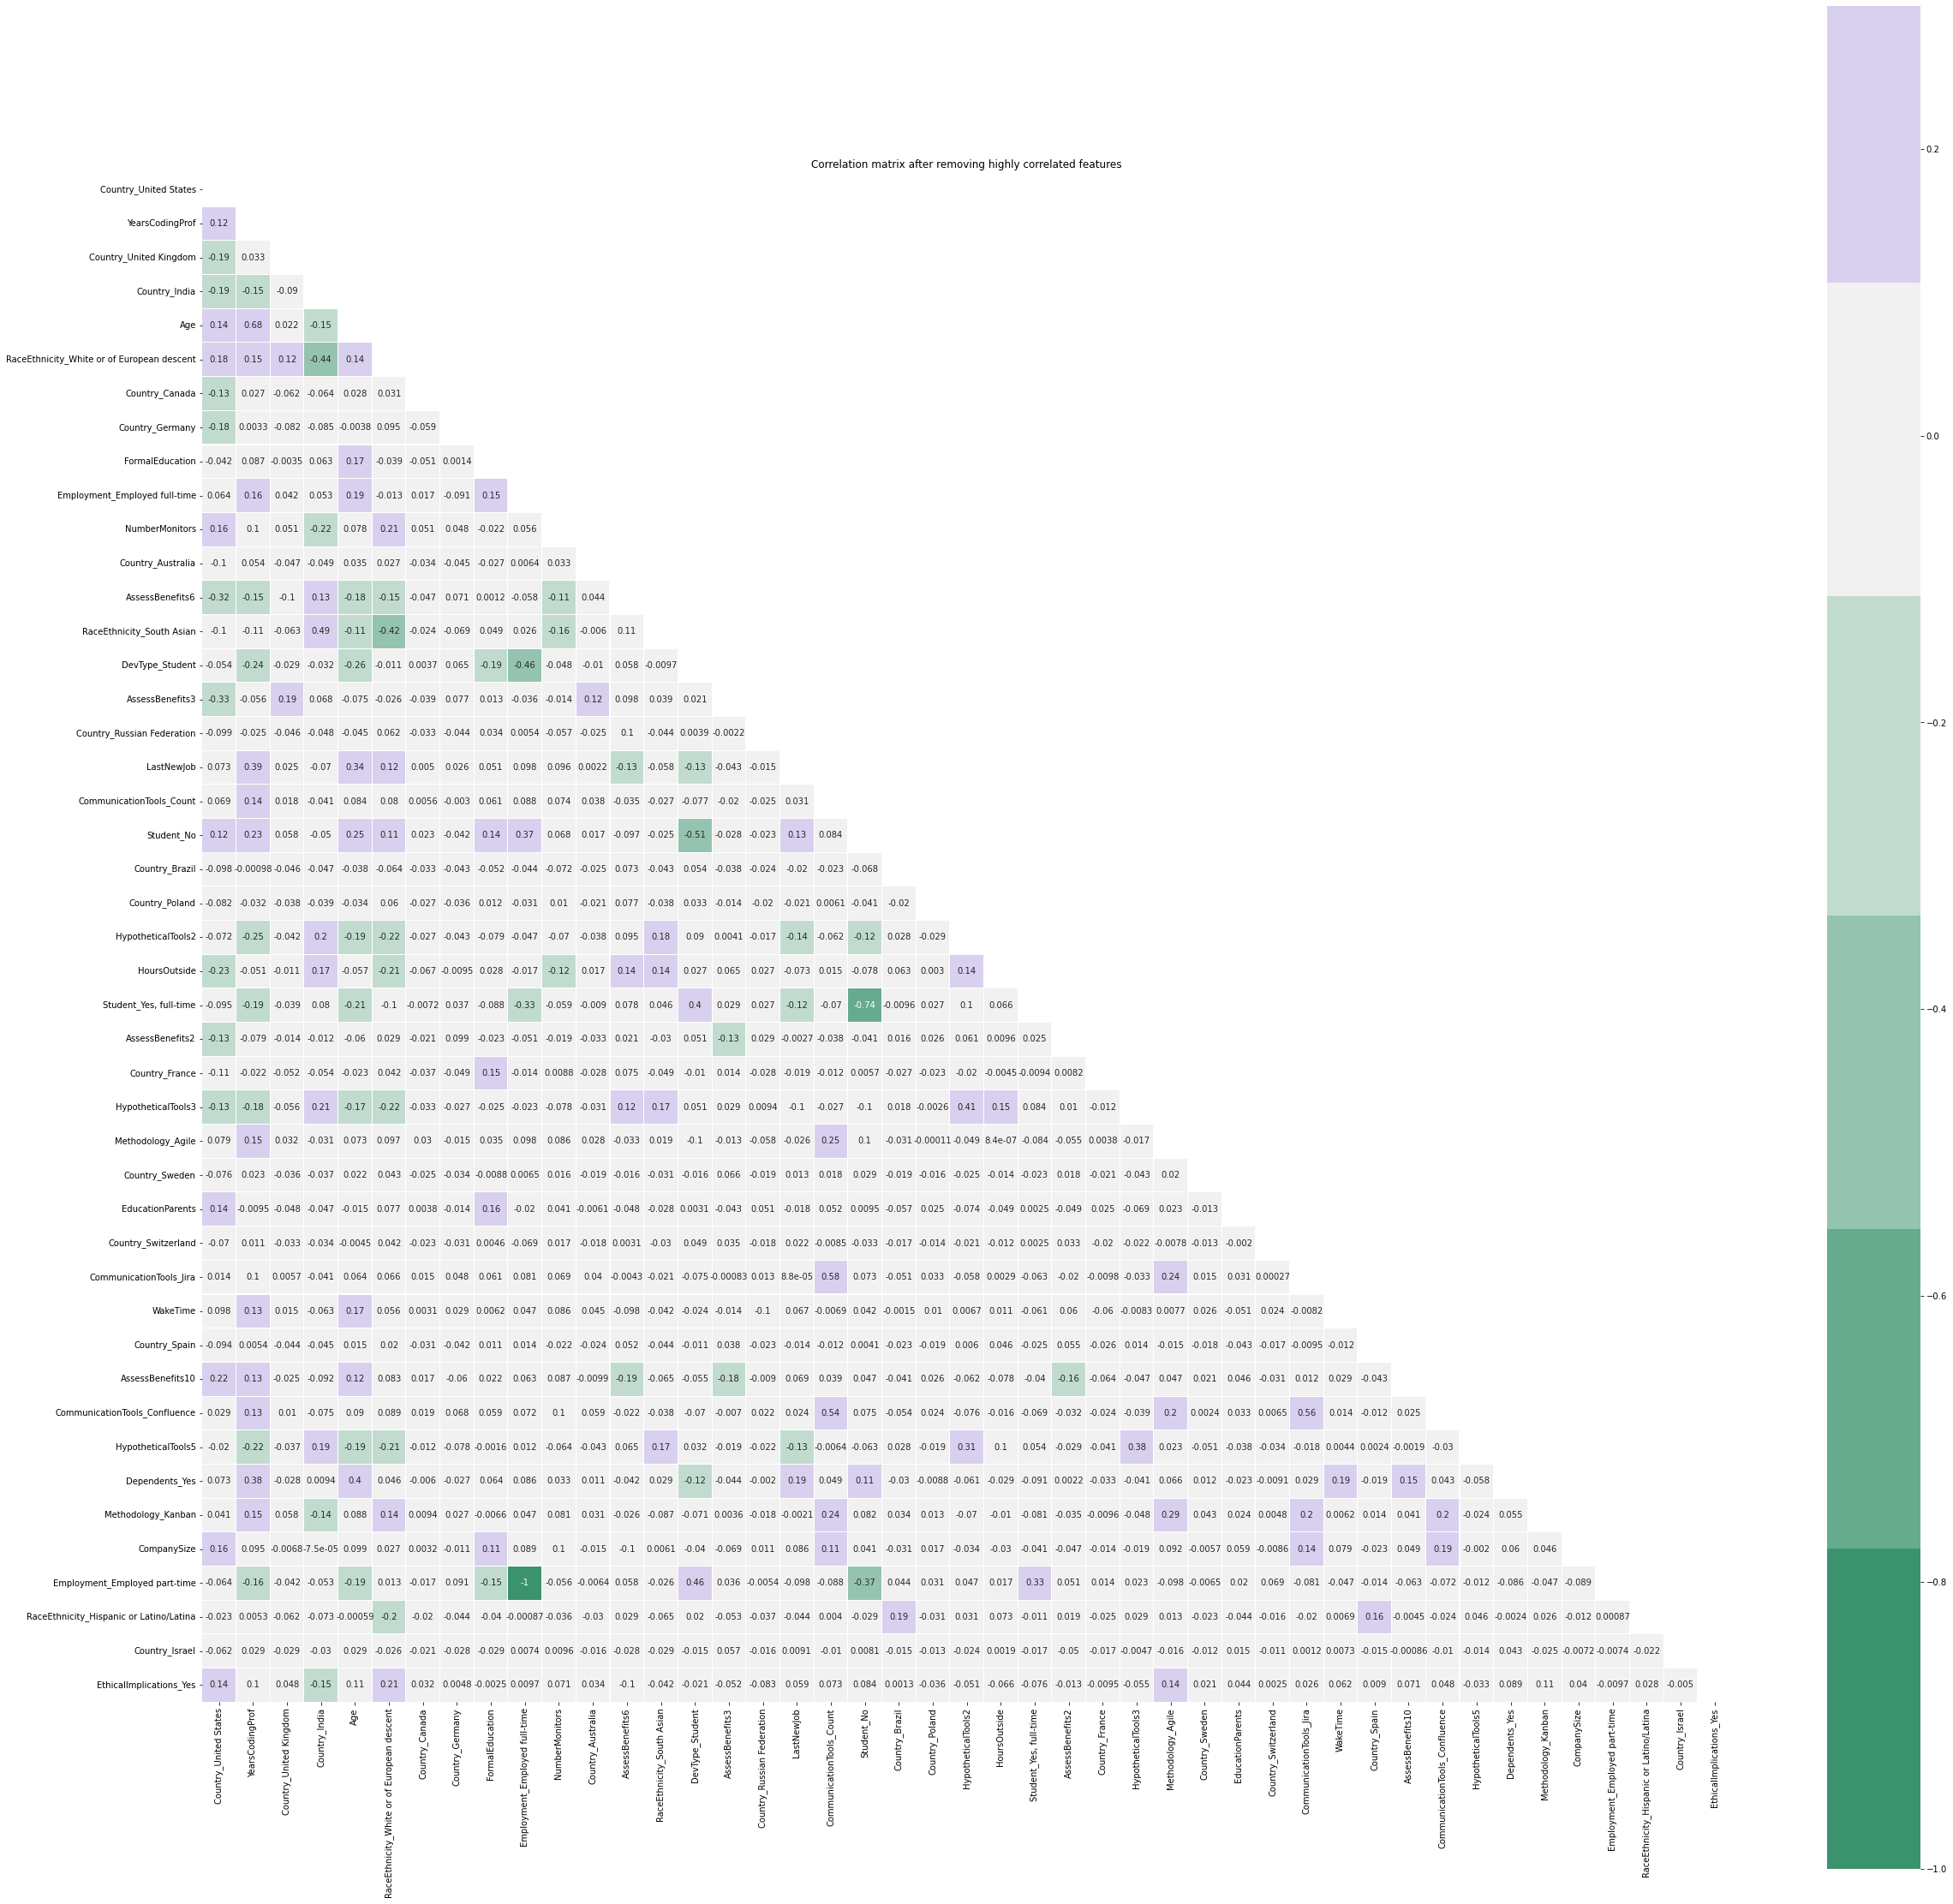

In [ ]:
# корреляция выбранных столбцов друг с другом
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
plt.figure(figsize=(40, 40))
corr = X.corr('spearman')

# Создаём маску для верхнего треугольника
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix after removing highly correlated features')

In [ ]:
cols= list(X.columns)
len(cols)

45

7. Первые Результаты

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
# разделение и стандартизация данных как тестовых и обучающих
models=[]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
models.append(("CatBoost", CatBoostRegressor(verbose = False)))
models.append(("LightGBM", LGBMRegressor()))
models.append(("XGBoost", XGBRegressor(verbose = 0)))
models.append(('GBM', GradientBoostingRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [ ]:
# первые результаты
firstResultList=[]
for name, model in models:
        model.fit(X_train, y_train)
        y_pred  = model.predict(X_test)
        rmse    = np.sqrt(mean_squared_error(y_test, y_pred))      
        msg     = "%s-----> %.2f" % (name, rmse)
        firstResultList.append(msg)
        print(msg)

CatBoost-----> 23245.19
LightGBM-----> 23455.89
[09:03:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost-----> 24078.17
GBM-----> 24086.50
RF-----> 24048.99
KNN-----> 27051.22
SVR-----> 42353.50


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLP-----> 30977.73
CART-----> 35338.52


In [ ]:
first_score_df = pd.DataFrame({"First Score":firstResultList})
first_score_df

,First Score
0,CatBoost-----> 23245.19
1,LightGBM-----> 23455.89
2,XGBoost-----> 24078.17
3,GBM-----> 24086.50
4,RF-----> 24048.99
5,KNN-----> 27051.22
6,SVR-----> 42353.50
7,MLP-----> 30977.73
8,CART-----> 35338.52


8. Model Tuning

CatBoost

In [ ]:
catb_model = CatBoostRegressor(verbose = False)

In [ ]:
atb_params = { "iterations"    : [500,1000,10000],
                "learning_rate" : [0.01,0.1,1],
                "depth"         : [2,6,10]}

In [ ]:
#catb_cv_model = GridSearchCV( catb_model, catb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
#catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor( iterations    = 10000,
                                learning_rate = 0.01,
                                depth         = 6 , verbose = False).fit(X_train, y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
catb_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
catb_tuned_score

23231.300614633627

LightGBM

In [ ]:
lgb_model = LGBMRegressor()

In [ ]:
lgbm_params = { "learning_rate"   : [0.01, 0.1, 1],
                "n_estimators"    : [200,1000,10000],
                "max_depth"       : [2,5,10],
                "colsample_bytree": [1,0.5,0.3]}

In [ ]:
#lgbm_cv_model = GridSearchCV(lgb_model, lgbm_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)

In [ ]:
#lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor( learning_rate=0.01,
                            n_estimators=10000,
                            max_depth=10,
                            colsample_bytree=0.3).fit(X_train, y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
lgbm_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
lgbm_tuned_score

23359.95168135894

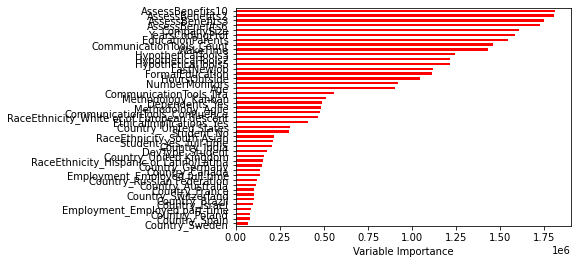

In [ ]:
Importance = pd.DataFrame({'Importance':lgbm_tuned.feature_importances_*100}, 
                          index = cols)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

XGBoost

In [ ]:
xgb_params = {"learning_rate"   : [0.1,0.01,1],
             "max_depth"        : [2,5,8],
             "n_estimators"     : [100,500,1000],
             "colsample_bytree" : [0.3,0.6,1]}

In [ ]:
xgb = XGBRegressor()

In [ ]:
#xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
#xgb_cv_model.best_params_

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.3,
                        learning_rate     = 0.1,
                        max_depth         = 5,
                        n_estimators      = 500).fit(X_train, y_train)

[09:08:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = xgb_tuned.predict(X_test)
xgb_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_tuned_score

23348.42486209002

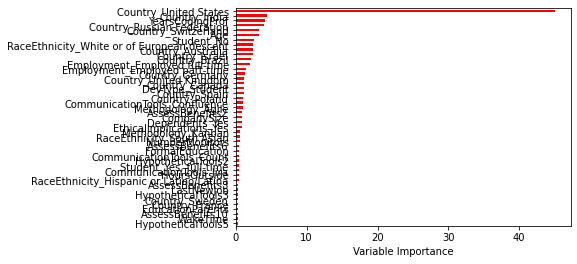

In [ ]:
Importance = pd.DataFrame({'Importance':xgb_tuned.feature_importances_*100}, 
                          index = cols)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

GradientBoostingRegressor

In [ ]:
gbm_params = {"learning_rate" : [0.001,0.1,0.01],
              "max_depth"     : [3,5,8],
              "n_estimators"  : [200,500,1000],
              "subsample"     : [1,0.5,0.8] }

In [ ]:
gbm_model = GradientBoostingRegressor()

In [ ]:
#gbm_cv_model = GridSearchCV(gbm_model,gbm_params, cv = 10, n_jobs=-1, verbose = 2).fit(X_train, y_train)

In [ ]:
#gbm_cv_model.best_params_

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=1).fit(X_train, y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
gbm_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
gbm_tuned_score

23411.99492962934

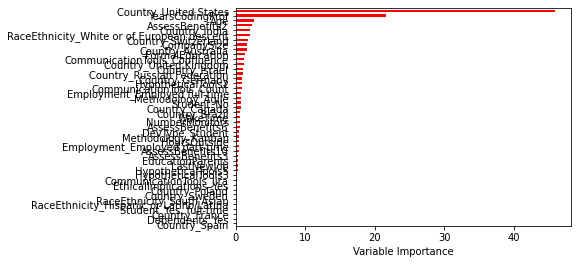

In [ ]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = cols)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

KNeighborsRegressor

In [ ]:
knn_params    = {"n_neighbors": np.arange(1,30,1)}
knn_model     = KNeighborsRegressor()
#knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)

In [ ]:
#knn_cv_model.best_params_

In [ ]:
knn_tuned = KNeighborsRegressor(n_neighbors= 29).fit(X_train, y_train)

In [ ]:
y_pred = knn_tuned.predict(X_test)
knn_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
knn_tuned_score

25383.439447526034

CART

In [ ]:
cart_params = { "max_depth"         : [2,3,4,5,6,8,10,20,30,50, 100, 500, 1000,5000,10000],
                "min_samples_split" : [2,5,10,20,30,50,100,500,1000,5000,10000]}

In [ ]:
cart_model = DecisionTreeRegressor()

In [ ]:
#cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [ ]:
#cart_cv_model.best_params_

In [ ]:
cart_tuned = DecisionTreeRegressor(max_depth=10, min_samples_split=100).fit(X_train, y_train)

In [ ]:
y_pred = cart_tuned.predict(X_test)
cart_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
cart_tuned_score

26169.717837490163

MLPRegressor

In [ ]:
mlp = MLPRegressor()

In [ ]:
mlp_params = {"alpha"              : [0.1, 0.01, 0.02, 0.001, 0.0001], 
              "hidden_layer_sizes" : [(10,20), (5,5), (100,100), (1000,100,10)]}

In [ ]:
#mlp_cv_model = GridSearchCV(mlp, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train, y_train)

In [ ]:
#mlp_cv_model.best_params_

In [ ]:
mlp_tuned = MLPRegressor( alpha = 0.02, hidden_layer_sizes  = (1000,100,10)).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
y_pred = mlp_tuned.predict(X_test)
mlp_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
mlp_tuned_score

23331.909993365083

SVR

In [ ]:
#nonlinear
svr_model     = SVR()
svr_params    = {"C": [0.01, 0.1,0.3,0.5,0.8,1,5, 10, 50, 100,500,1000,10000]}
#svr_cv_model  = GridSearchCV(svr_model, svr_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
#svr_cv_model.best_params_

In [ ]:
svr_tuned = SVR(C=10000).fit(X_train, y_train)

In [ ]:
y_pred          = svr_tuned.predict(X_test)
svr_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
svr_tuned_score

23668.93370364996

9. Результаты

In [ ]:
index = ["GBM_tuned","XGB_tuned","LGBM_tuned","CATB_tuned","KNN_tuned","CART_tuned","MLP_tuned","SVR_tuned" ]
tuned_score_df = pd.DataFrame({"Tuned Score":[gbm_tuned_score, xgb_tuned_score,
                                              lgbm_tuned_score, catb_tuned_score, 
                                              knn_tuned_score, cart_tuned_score,
                                              mlp_tuned_score, svr_tuned_score]})
tuned_score_df.index = index
tuned_score_df.sort_values(by='Tuned Score')

,Tuned Score
CATB_tuned,23231.30
MLP_tuned,23331.91
XGB_tuned,23348.42
LGBM_tuned,23359.95
GBM_tuned,23411.99
SVR_tuned,23668.93
KNN_tuned,25383.44
CART_tuned,26169.72
